## **Prevendo o Consumo de Energia de Carros Elétricos**

#### Autor: Ranieri Miranda Imperatori
#### Data: 20 Dez 2022

Este projeto tem como objetivo, prever o consumo de energia de carros elétricos com base em diversos fatores de utilização e características dos veículos, tais como: o tipo e número de motores elétricos do veículo; o peso do veículo; a capacidade de carga; entre outros.


**Para a construção deste projeto, utilizaremos um conjunto de dados disponíveis em:** https://data.mendeley.com/datasets/tb9yrptydn/2



**Bibliotecas:**

In [2]:
library(dplyr)
library(ggplot2)
library(patchwork)
library(caret)
library(Amelia)
library(randomForest)
library(e1071)
library(repr)
library(moments)
library(corrplot)
library(caTools)
options(repr.plot.height = 8 ,repr.plot.width = 12)
options(warn = -1) #omitindo warnings no output das células



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: lattice

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.0, built: 2021-05-26)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘moments’


The following objects are masked from ‘package:e1071’:

    kurtosis, moment, skewness


corrplot 0.92 loaded



## **1. Importação dos Dados e Análise Exploratória**

In [3]:
dados <- read.csv("dataset.csv")
dim(dados)
head(dados, n = 10)
str(dados)

[1] 53 25

,Car.full.name,Make,Model,Minimal.price..gross...PLN.,Engine.power..KM.,Maximum.torque..Nm.,Type.of.brakes,Drive.type,Battery.capacity..kWh.,Range..WLTP...km.,⋯,Permissable.gross.weight..kg.,Maximum.load.capacity..kg.,Number.of.seats,Number.of.doors,Tire.size..in.,Maximum.speed..kph.,Boot.capacity..VDA...l.,Acceleration.0.100.kph..s.,Maximum.DC.charging.power..kW.,mean...Energy.consumption..kWh.100.km.
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>
1,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95,438,⋯,3130,640,5,5,19,200,660,"5,7",150,"24,45"
2,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71,340,⋯,3040,670,5,5,19,190,660,"6,8",150,"23,8"
3,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95,364,⋯,3130,565,5,5,20,210,660,"4,5",150,"27,55"
4,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71,346,⋯,3040,640,5,5,19,190,615,"6,8",150,"23,3"
5,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95,447,⋯,3130,670,5,5,19,200,615,"5,7",150,"23,85"
6,Audi e-tron Sportback S quattro,Audi,e-tron Sportback S quattro,426200,503,973,disc (front + rear),4WD,95,369,⋯,3130,565,5,5,20,210,615,"4,5",150,"27,2"
7,BMW i3,BMW,i3,169700,170,250,disc (front + rear),2WD (rear),"42,2",359,⋯,1730,440,4,5,19,160,260,"8,1",50,"13,1"
8,BMW i3s,BMW,i3s,184200,184,270,disc (front + rear),2WD (rear),"42,2",345,⋯,1730,440,4,5,20,160,260,"6,9",50,"14,3"
9,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80,460,⋯,2725,540,5,5,19,180,510,"6,8",150,"18,8"


'data.frame':	53 obs. of  25 variables:
 $ Car.full.name                         : chr  "Audi e-tron 55 quattro" "Audi e-tron 50 quattro" "Audi e-tron S quattro" "Audi e-tron Sportback 50 quattro" ...
 $ Make                                  : chr  "Audi" "Audi" "Audi" "Audi" ...
 $ Model                                 : chr  "e-tron 55 quattro" "e-tron 50 quattro" "e-tron S quattro" "e-tron Sportback 50 quattro" ...
 $ Minimal.price..gross...PLN.           : int  345700 308400 414900 319700 357000 426200 169700 184200 282900 125000 ...
 $ Engine.power..KM.                     : int  360 313 503 313 360 503 170 184 286 136 ...
 $ Maximum.torque..Nm.                   : int  664 540 973 540 664 973 250 270 400 260 ...
 $ Type.of.brakes                        : chr  "disc (front + rear)" "disc (front + rear)" "disc (front + rear)" "disc (front + rear)" ...
 $ Drive.type                            : chr  "4WD" "4WD" "4WD" "4WD" ...
 $ Battery.capacity..kWh.                : chr  "95" "71

Temos um dataset, listando 53 modelos de carros elétricos com suas respectivas marcas (fabricantes); e também, com várias características técnicas, como por exemplo: preço, potência do motor, torque máximo, comprimento, número de assentos, velocidade máxima, entre outros; além da variável *target*: média do consumo da bateria.
Vamos renomear as colunas, para melhorar a legibilidade.

In [4]:
nomes_colunas <- list("Nome_Carro", "Marca", "Modelo", "Preco_Minimo_Bruto", "Potencia_Motor", "Torque_Maximo", "Tipo_Freio", "Tipo_Tracao", "Capacidade_Bateria", "Rendimento_WLTP", 
                      "Distancia_Entre_Eixos", "Comprimento", "Largura", "Altura", "Peso_Vazio_Minimo", "Peso_Bruto_Admissível", "Capacidade_Carga_Maxima",
                      "Numero_Assentos", "Numero_Portas", "Tamanho_Pneu", "Velocidade_Maxima", "Espaco_Porta_Mala", "Aceleracao", "Poder_Carregamento_Rapido",
                      "Media_Consumo_Bateria")

colnames(dados) <- nomes_colunas
head(dados, n = 3)

,Nome_Carro,Marca,Modelo,Preco_Minimo_Bruto,Potencia_Motor,Torque_Maximo,Tipo_Freio,Tipo_Tracao,Capacidade_Bateria,Rendimento_WLTP,⋯,Peso_Bruto_Admissível,Capacidade_Carga_Maxima,Numero_Assentos,Numero_Portas,Tamanho_Pneu,Velocidade_Maxima,Espaco_Porta_Mala,Aceleracao,Poder_Carregamento_Rapido,Media_Consumo_Bateria
,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>
1,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95,438,⋯,3130,640,5,5,19,200,660,"5,7",150,"24,45"
2,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71,340,⋯,3040,670,5,5,19,190,660,"6,8",150,"23,8"
3,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95,364,⋯,3130,565,5,5,20,210,660,"4,5",150,"27,55"


Ao observar atentamente as variáveis, podemos perceber que existem variáveis numéricas e categóricas que foram importadas como caractere.  
Antes de realizar a conversão das variáveis numéricas, precisamos trocar a vírgula da casa decimal (que consta no dataset original) por um ponto; caso contrário, vamos ter problemas durante a conversão.   Portanto:

In [5]:
dados$Capacidade_Bateria <- gsub(",", ".", dados$Capacidade_Bateria)
dados$Distancia_Entre_Eixos <- gsub(",", ".", dados$Distancia_Entre_Eixos)
dados$Comprimento <- gsub(",", ".", dados$Comprimento)
dados$Largura <- gsub(",", ".", dados$Largura)
dados$Altura <- gsub(",", ".", dados$Altura)
dados$Aceleracao <- gsub(",", ".", dados$Aceleracao)
dados$Media_Consumo_Bateria <- gsub(",", ".", dados$Media_Consumo_Bateria)


Agora, podemos converter as variáveis cujo tipo de dado foi interpretado errado pela linguagem R.

In [6]:
dados$Marca <- as.factor(dados$Marca)
dados$Tipo_Freio <- as.factor(dados$Tipo_Freio)
dados$Tipo_Tracao <- as.factor(dados$Tipo_Tracao)
dados$Numero_Assentos <- as.factor(dados$Numero_Assentos)
dados$Numero_Portas <- as.factor(dados$Numero_Portas)
dados$Capacidade_Bateria <- as.numeric(dados$Capacidade_Bateria)
dados$Distancia_Entre_Eixos <- as.numeric(dados$Distancia_Entre_Eixos)
dados$Comprimento <- as.numeric(dados$Comprimento)
dados$Largura <- as.numeric(dados$Largura)
dados$Altura <- as.numeric(dados$Altura)
dados$Aceleracao <- as.numeric(dados$Aceleracao)
dados$Media_Consumo_Bateria <- as.numeric(dados$Media_Consumo_Bateria)

str(dados)


'data.frame':	53 obs. of  25 variables:
 $ Nome_Carro               : chr  "Audi e-tron 55 quattro" "Audi e-tron 50 quattro" "Audi e-tron S quattro" "Audi e-tron Sportback 50 quattro" ...
 $ Marca                    : Factor w/ 20 levels "Audi","BMW","Citroën",..: 1 1 1 1 1 1 2 2 2 3 ...
 $ Modelo                   : chr  "e-tron 55 quattro" "e-tron 50 quattro" "e-tron S quattro" "e-tron Sportback 50 quattro" ...
 $ Preco_Minimo_Bruto       : int  345700 308400 414900 319700 357000 426200 169700 184200 282900 125000 ...
 $ Potencia_Motor           : int  360 313 503 313 360 503 170 184 286 136 ...
 $ Torque_Maximo            : int  664 540 973 540 664 973 250 270 400 260 ...
 $ Tipo_Freio               : Factor w/ 3 levels "","disc (front + rear)",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Tipo_Tracao              : Factor w/ 3 levels "2WD (front)",..: 3 3 3 3 3 3 2 2 2 1 ...
 $ Capacidade_Bateria       : num  95 71 95 71 95 95 42.2 42.2 80 50 ...
 $ Rendimento_WLTP          : int  438 340 364 346

### **1.1 Verificando valores missing no Dataset**

In [7]:
sum(is.na(dados))

[1] 29

Temos 29 valores missing em nossos dados. Vamos utilizar o missmap, para agilizar a identificação de quais são esses dados que estão faltando.

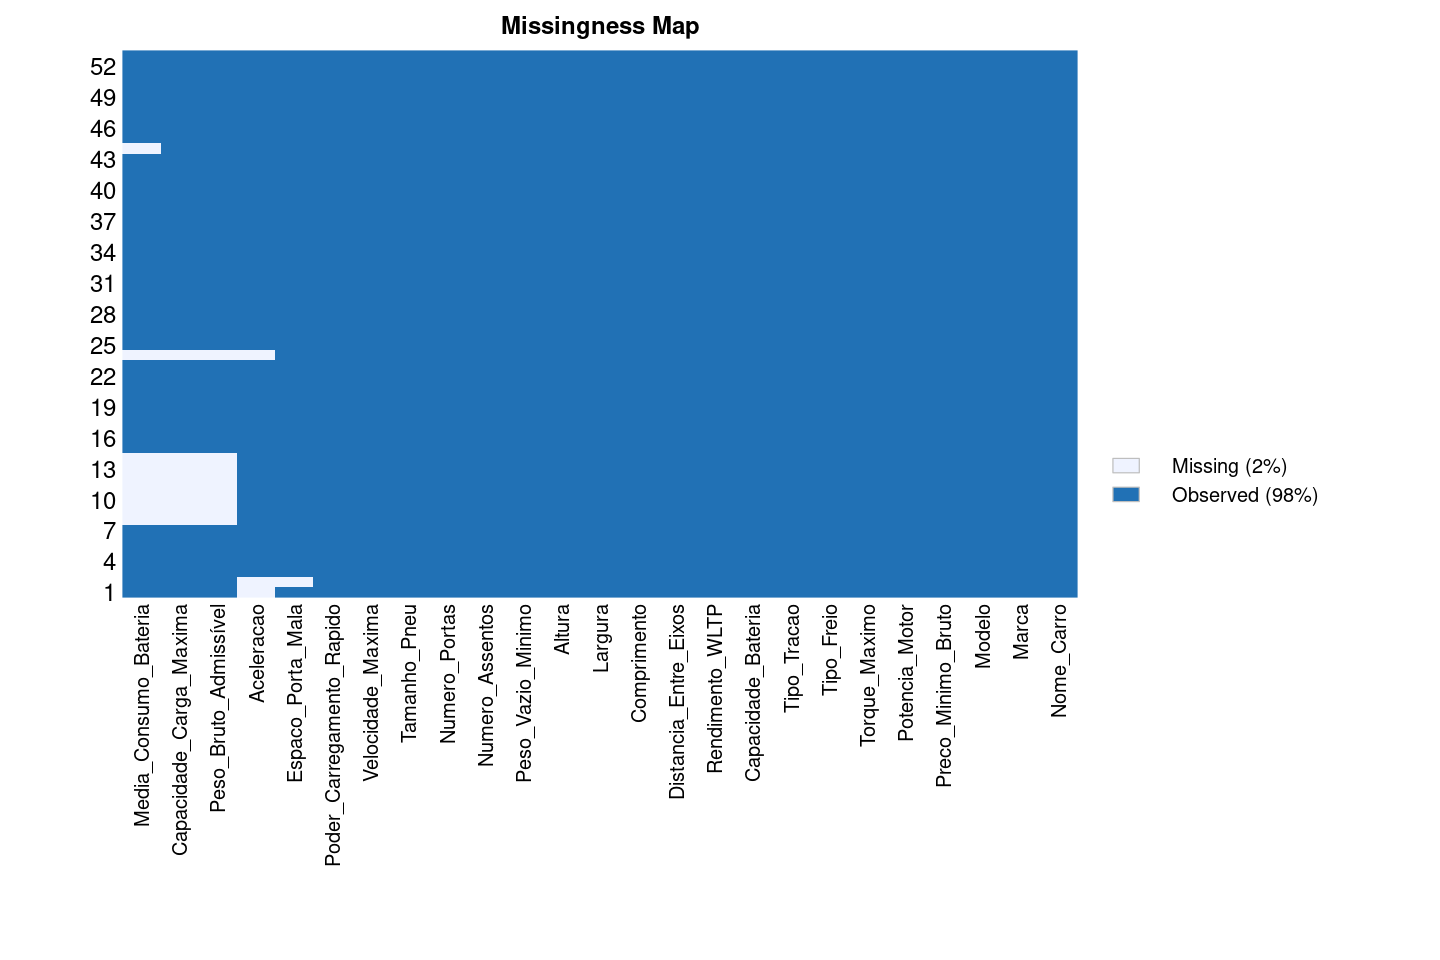

In [8]:
Amelia::missmap(dados, x.cex = 1 ,y.cex = 1.2, margins = c(15,5), y.labels = TRUE, y.at = TRUE)

Vamos extrair para um novo dataset, todos os carros que tem alguma informação faltando, para que possamos analisar melhor e decidir como proceder.

In [9]:
missingdata <- as.data.frame(dados[!complete.cases(dados), ])
View(missingdata)
length(missingdata$Nome_Carro)

,Nome_Carro,Marca,Modelo,Preco_Minimo_Bruto,Potencia_Motor,Torque_Maximo,Tipo_Freio,Tipo_Tracao,Capacidade_Bateria,Rendimento_WLTP,⋯,Peso_Bruto_Admissível,Capacidade_Carga_Maxima,Numero_Assentos,Numero_Portas,Tamanho_Pneu,Velocidade_Maxima,Espaco_Porta_Mala,Aceleracao,Poder_Carregamento_Rapido,Media_Consumo_Bateria
,<chr>,<fct>,<chr>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<int>,⋯,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<int>,<dbl>
10,Citroën ë-C4,Citroën,ë-C4,125000,136,260,disc (front + rear),2WD (front),50,350,⋯,2000,459,5,5,16,150,380,9.5,100,NA
30,Peugeot e-2008,Peugeot,e-2008,149400,136,260,disc (front + rear),2WD (front),50,320,⋯,NA,NA,5,5,16,150,434,NA,100,NA
40,Tesla Model 3 Standard Range Plus,Tesla,Model 3 Standard Range Plus,195490,285,450,disc (front + rear),2WD (rear),54,430,⋯,NA,NA,5,5,18,225,425,5.6,150,NA
41,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,510,disc (front + rear),4WD,75,580,⋯,NA,NA,5,5,18,233,425,4.4,150,NA
42,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,639,disc (front + rear),4WD,75,567,⋯,NA,NA,5,5,20,261,425,3.3,150,NA
43,Tesla Model S Long Range Plus,Tesla,Model S Long Range Plus,368990,525,755,disc (front + rear),4WD,100,652,⋯,NA,NA,5,5,19,250,745,3.8,150,NA
44,Tesla Model S Performance,Tesla,Model S Performance,443990,772,1140,disc (front + rear),4WD,100,639,⋯,NA,NA,5,5,21,261,745,2.5,150,NA
45,Tesla Model X Long Range Plus,Tesla,Model X Long Range Plus,407990,525,755,disc (front + rear),4WD,100,561,⋯,NA,NA,7,5,20,250,857,4.6,150,NA
46,Tesla Model X Performance,Tesla,Model X Performance,482990,772,1140,disc (front + rear),4WD,100,548,⋯,NA,NA,7,5,20,261,857,2.8,150,NA


[1] 11

Temos 11 modelos de carro que estão com alguma informação faltando, sendo que em 9 desses modelos, a informação que falta é justamente a variável alvo deste projeto: **Média de consumo da bateria!**        Podemos optar por excluir estes registros do nosso dataset original, porém vale ressaltar que ao realizar esta ação, estaremos excluindo todos os modelos de carro da fabricante *Tesla*!  
Por hora, vamos realizar a exclusão dos registros com informações *missing* (cientes que estamos retirando todos os modelos da fabricante *Tesla*) e prosseguir com nossa análise exploratória.

In [10]:
dados_limpos <- na.omit(dados)
length(dados_limpos$Nome_Carro)

#Salvando dataset limpos (sem as linhas com valores missing)
write.table(dados_limpos, file = "/home/ranieri/Desktop/Projeto-Carros-Eletricos/Datasets_Criados/Dados_Limpos.csv", sep = ",", col.names = TRUE, row.names = FALSE)

[1] 42

In [11]:
summary(dados_limpos)


  Nome_Carro               Marca       Modelo          Preco_Minimo_Bruto
 Length:42          Audi      : 6   Length:42          Min.   : 82050    
 Class :character   Kia       : 4   Class :character   1st Qu.:140650    
 Mode  :character   Porsche   : 4   Mode  :character   Median :166945    
                    Volkswagen: 4                      Mean   :235066    
                    BMW       : 3                      3rd Qu.:316875    
                    Hyundai   : 3                      Max.   :794000    
                    (Other)   :18                                        
 Potencia_Motor  Torque_Maximo                         Tipo_Freio
 Min.   : 82.0   Min.   : 160.0                             : 0  
 1st Qu.:136.0   1st Qu.: 260.0   disc (front + rear)       :35  
 Median :184.0   Median : 317.5   disc (front) + drum (rear): 7  
 Mean   :237.7   Mean   : 425.2                                  
 3rd Qu.:313.0   3rd Qu.: 540.0                                  
 Max.   :625

## **2. Análise exploratória e gráficos**

Vamos procurar entender um pouco mais sobre os nossos dados *(após aplicar o pré-processamento)*, com o auxílio de alguns gráficos.

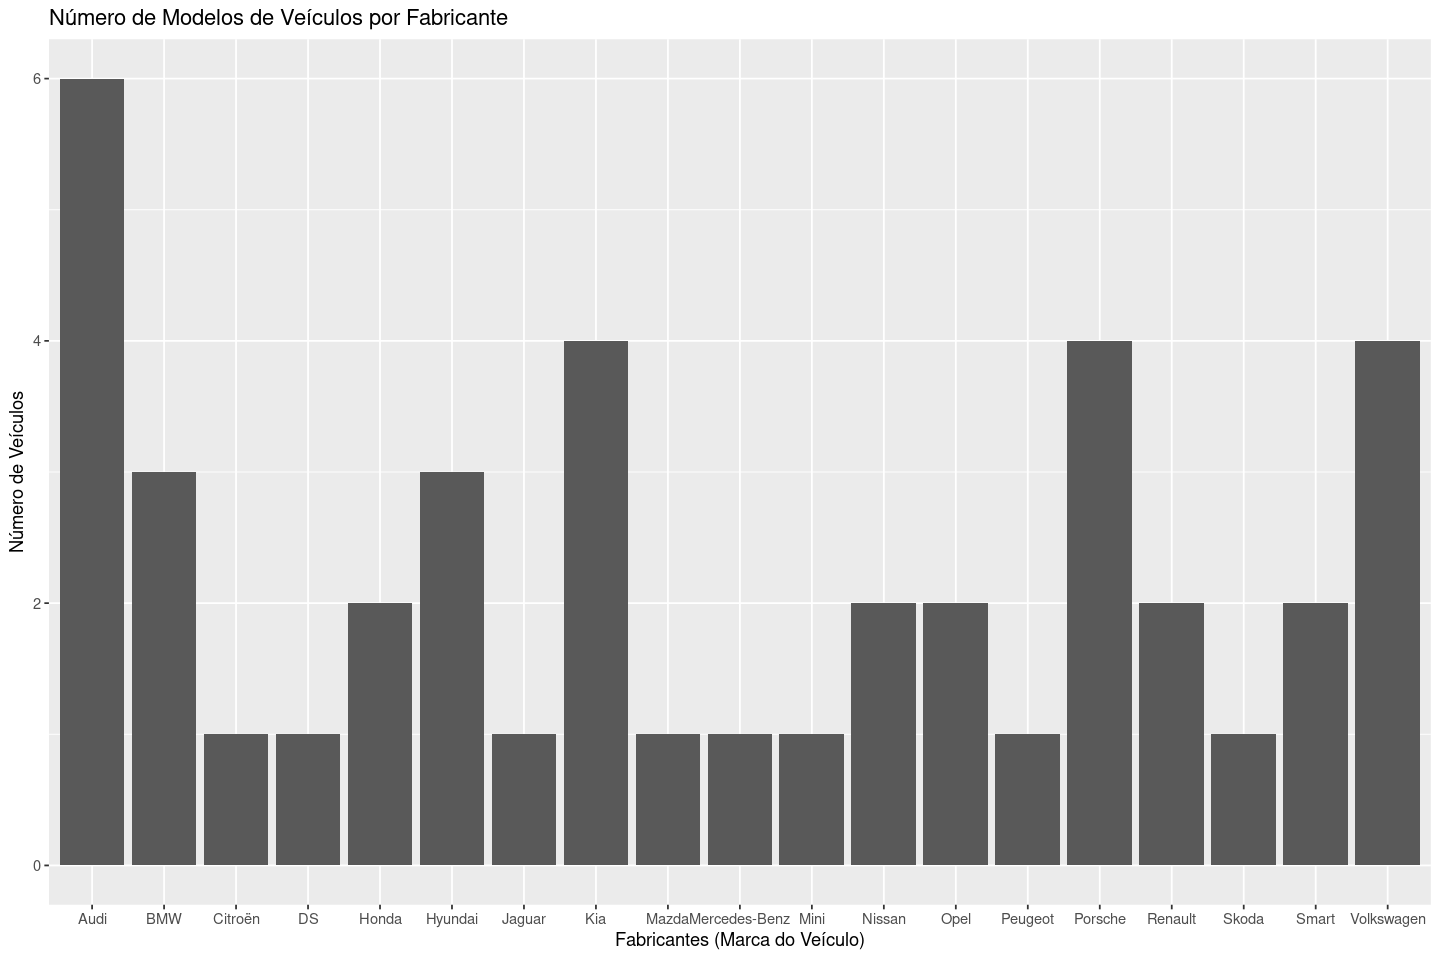

In [12]:
dados_limpos %>%
    ggplot(mapping = aes(x = dados_limpos$Marca)) +
    ggtitle("Número de modelos de veículos por marca") +
    geom_bar() +
    labs(x = "Fabricantes (Marca do Veículo)",
         y = "Número de Veículos",
         title = "Número de Modelos de Veículos por Fabricante") 

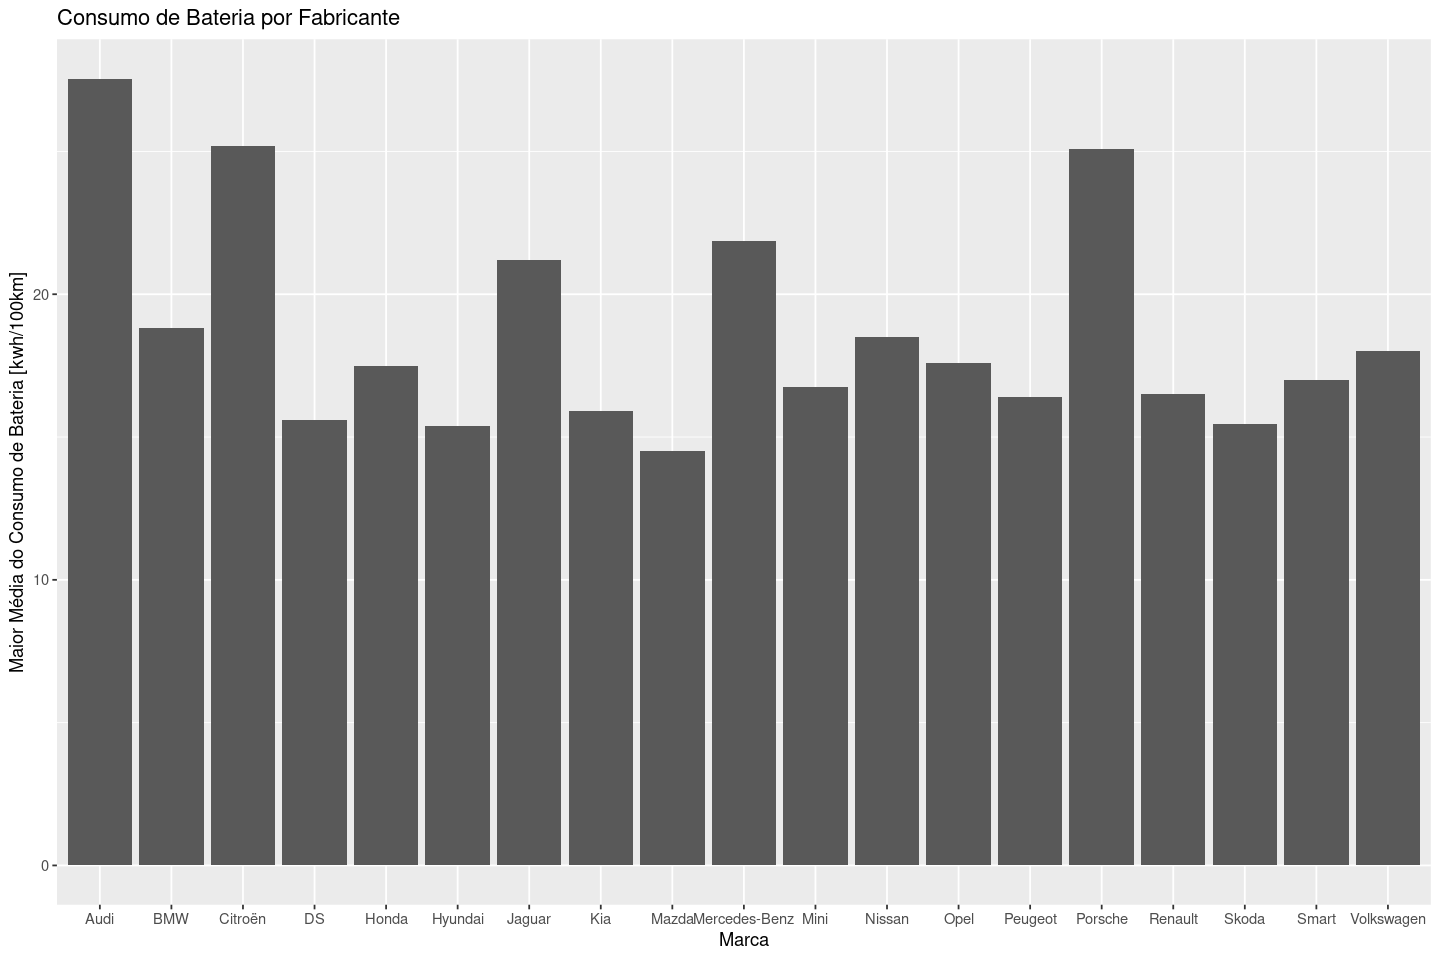

In [13]:
dados_limpos %>%
    group_by(Marca) %>%
    summarize(consumo = max(Media_Consumo_Bateria)) %>%
    ggplot(aes(Marca, consumo)) +
        geom_col() +
        labs(y = "Maior Média do Consumo de Bateria [kwh/100km]", title = "Consumo de Bateria por Fabricante")

A maioria dos modelos de veículos em nosso Dataset limpo, são da fabricante *Audi*, com 6 modelos; seguida das fabricantes *Kia*, *Porsche* e *Volkswagen*, com 4 modelos cada. Além desta observação, também é possível notar que entre os modelos que estamos analisando, os modelos da fabricante *Audi* aparecem liderando com o maior consumo de bateria, seguida das fabricantes *Citroën* e *Porsche*.

Vamos analisar qual é a correlação entre alguns dos atributos técnicos dos veículos com a média do consumo de bateria; ou seja, vamos analisar o grau de relacionamento entre essas variáveis.  
Mas, antes das correlações; vamos verificar algumas distribuições de frequências.

### **2.1 - Distribuição de Frequências** ###

Vamos chamar de $A_{p}$ o Coeficiente de Assimetria. Temos que:

* $A_{p} \approx 0$: dados simétricos. Tanto a cauda do lado direito quanto a do lado esquerdo da função densidade de probabilidade são iguais.
* $A_{p} < 0$: assimetria negativa. A cauda do lado esquedo da função densidade de probabilidade é maior que a do lado direito.
* $A_{p} > 0$: assimetria positiva. A cauda do lado direto da função densidade de probabilidade é maior que a do lado esquerdo.

O coeficiente de assimetria de Pearson $A_{p}$, baseia-se na posição relativa das medias de tendência central de acordo com o tipo de assimetria dos dados.  
Para calcular $A_{p}$, ou seja, para calcular o coeficiente de assimetria com a linguagem R, podemos utilizar a função *skewness()*.  
  
Em resumo, com o cálculo de $A_{p}$ e, também, com o auxílio visual por meio de histogramas; conseguimos identificar se determinada variável quantitativa apresenta (ou não) uma distribuição normal.  
Por exemplo, vamos analisar agora, somente as variáveis "Torque Máximo", "Média de Consumo da Bateria", "Peso Vazio Mínimo"  e "Aceleração"; calculando $A_{p}$ e plotando também o histograma e função densidade de probabilidade.

[1] "Coeficiente de Assimetria =  1.22873831005634"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



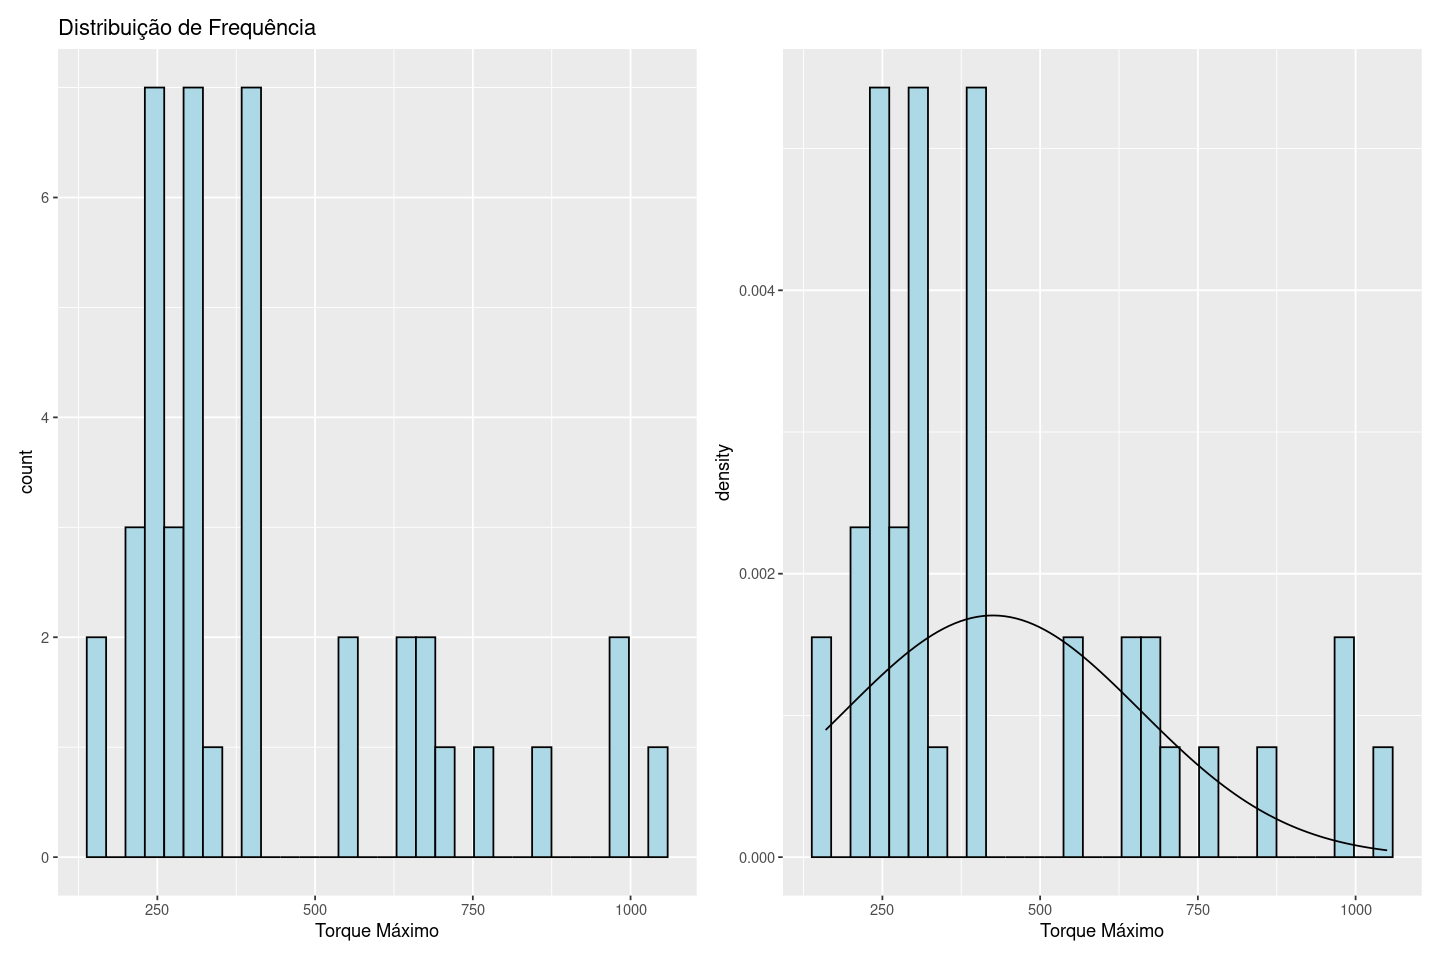

In [14]:
paste("Coeficiente de Assimetria = ", skewness(dados_limpos$Torque_Maximo))

g1 <- ggplot(dados_limpos) +
    aes(x=dados_limpos$Torque_Maximo) +
    geom_histogram(fill = "lightblue",
                   col = "black") +
    labs(x = "Torque Máximo", title = "Distribuição de Frequência")

g2 <- ggplot(dados_limpos) +
    aes(x=dados_limpos$Torque_Maximo) +
    geom_histogram(fill = "lightblue",
                   col = "black",
                   aes(y=..density..)) +
                   labs(x = "Torque Máximo") +
    stat_function(fun = dnorm, args = list(mean = mean(dados_limpos$Torque_Maximo), sd = sd(dados_limpos$Torque_Maximo)))

g1 + g2

[1] "Coeficiente de Assimetria =  0.75735750390106"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



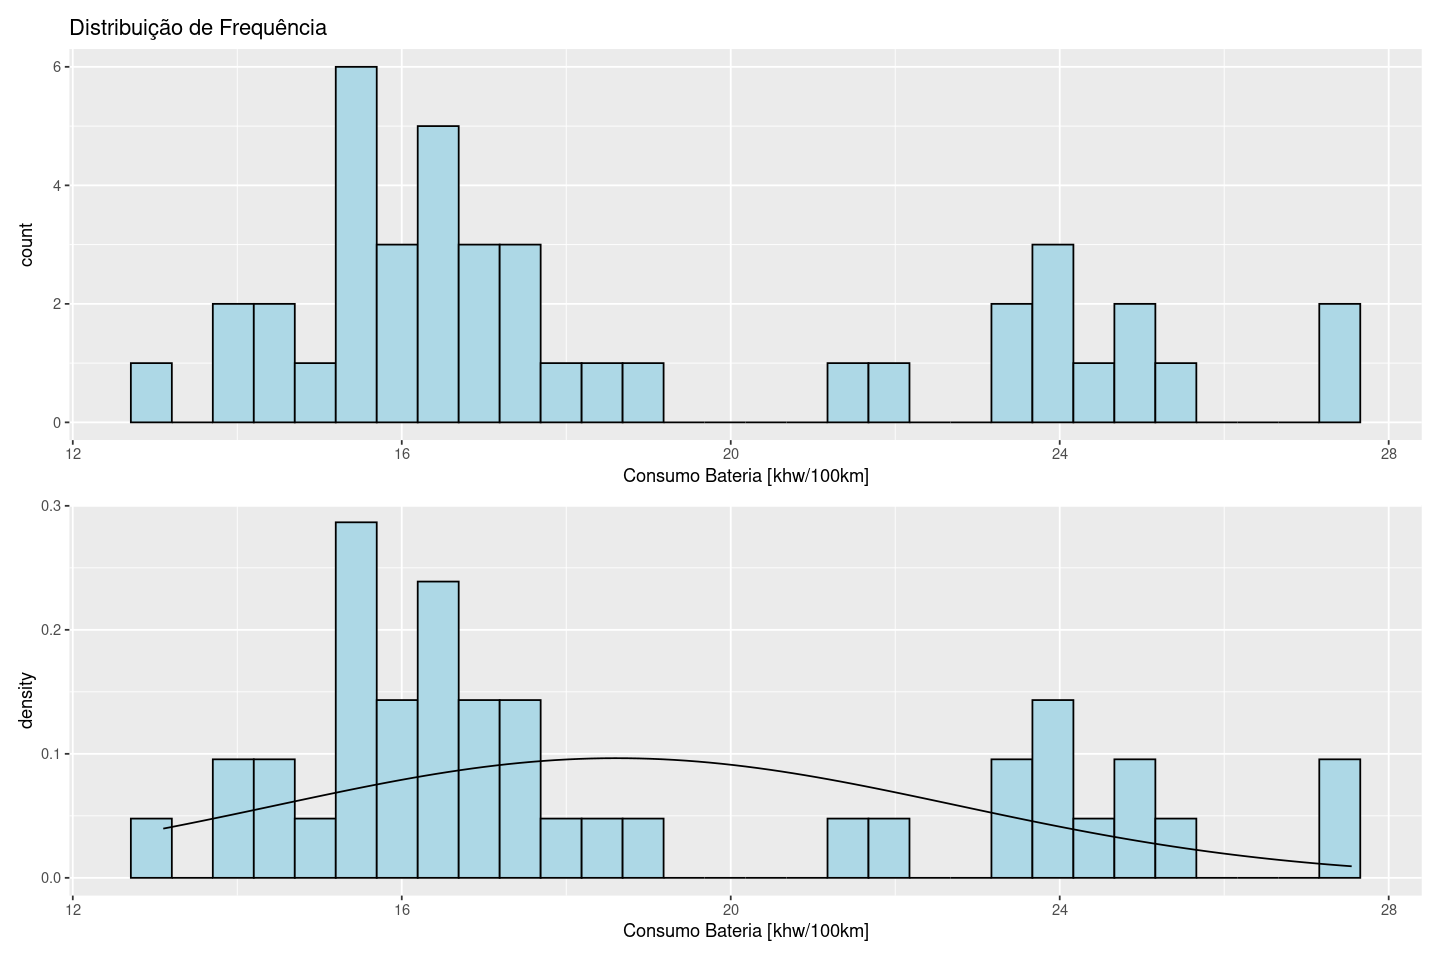

In [15]:
paste("Coeficiente de Assimetria = ", skewness(dados_limpos$Media_Consumo_Bateria))

g3 <- ggplot(dados_limpos) +
    aes(x=dados_limpos$Media_Consumo_Bateria) +
    geom_histogram(fill = "lightblue",
                   col = "black") +
    labs(x = "Consumo Bateria [khw/100km]", title = "Distribuição de Frequência")

g4 <- ggplot(dados_limpos) +
    aes(x=dados_limpos$Media_Consumo_Bateria) +
    geom_histogram(fill = "lightblue",
                   col = "black",
                   aes(y=..density..)) +
                   labs(x = "Consumo Bateria [khw/100km]") +
    stat_function(fun = dnorm, args = list(mean = mean(dados_limpos$Media_Consumo_Bateria), sd = sd(dados_limpos$Media_Consumo_Bateria)))

g3 / g4

[1] "Coeficiente de Assimetria =  0.430870266179767"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



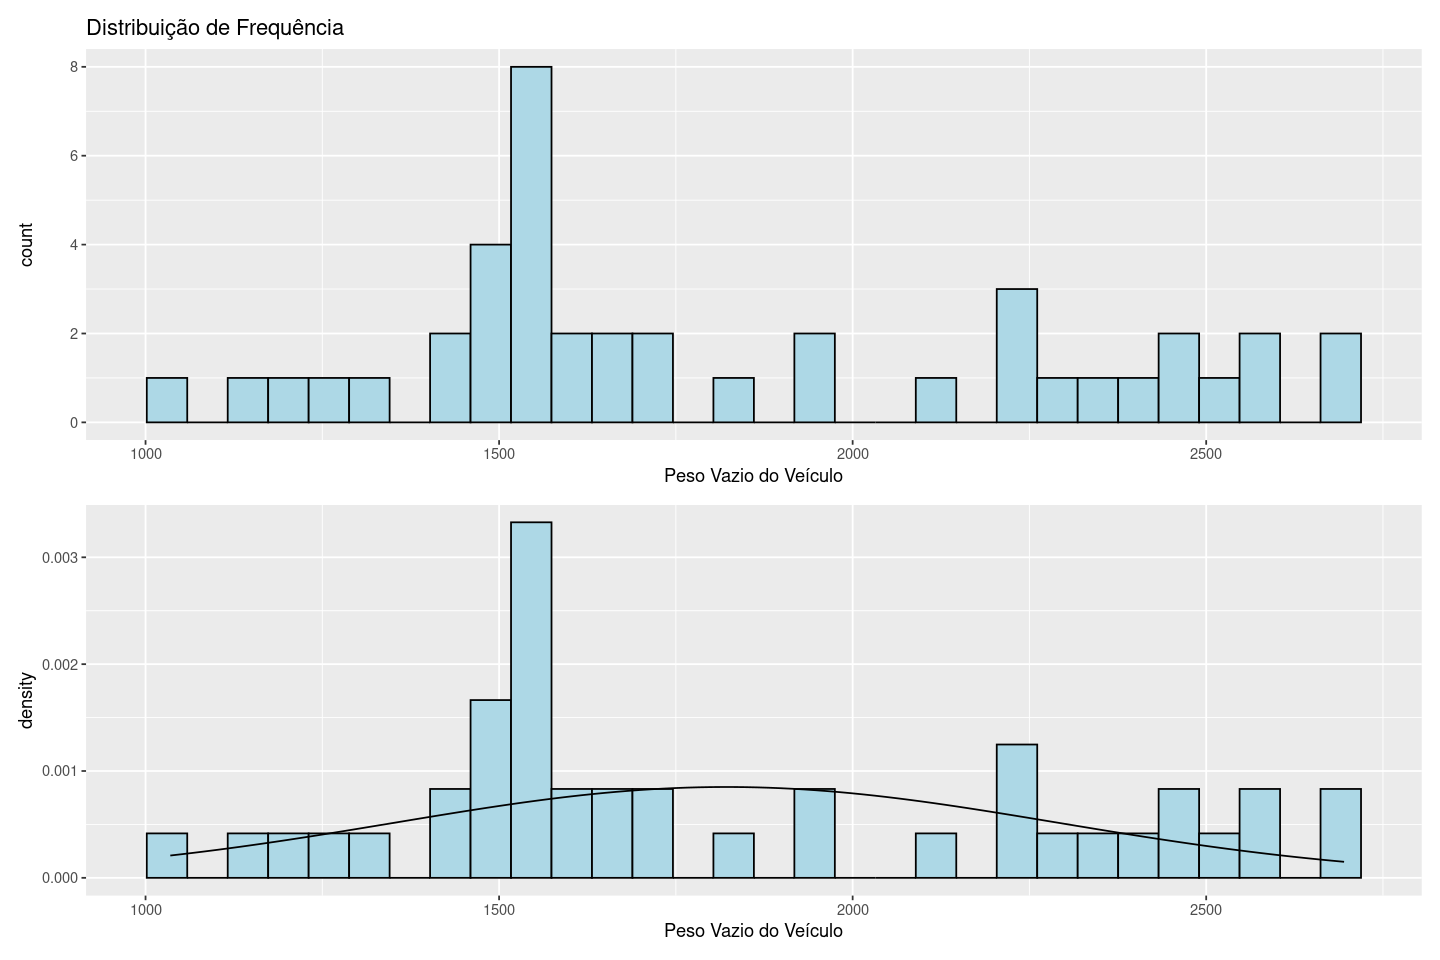

In [16]:
paste("Coeficiente de Assimetria = ", skewness(dados_limpos$Peso_Vazio_Minimo))

g5 <- ggplot(dados_limpos) +
    aes(x=dados_limpos$Peso_Vazio_Minimo) +
    geom_histogram(fill = "lightblue",
                   col = "black") +
    labs(x = "Peso Vazio do Veículo", title = "Distribuição de Frequência")

g6 <- ggplot(dados_limpos) +
    aes(x=dados_limpos$Peso_Vazio_Minimo) +
    geom_histogram(fill = "lightblue",
                   col = "black",
                   aes(y=..density..)) +
                   labs(x = "Peso Vazio do Veículo") +
    stat_function(fun = dnorm, args = list(mean = mean(dados_limpos$Peso_Vazio_Minimo), sd = sd(dados_limpos$Peso_Vazio_Minimo)))

g5 / g6

[1] "Coeficiente de Assimetria =  0.0415631323442198"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



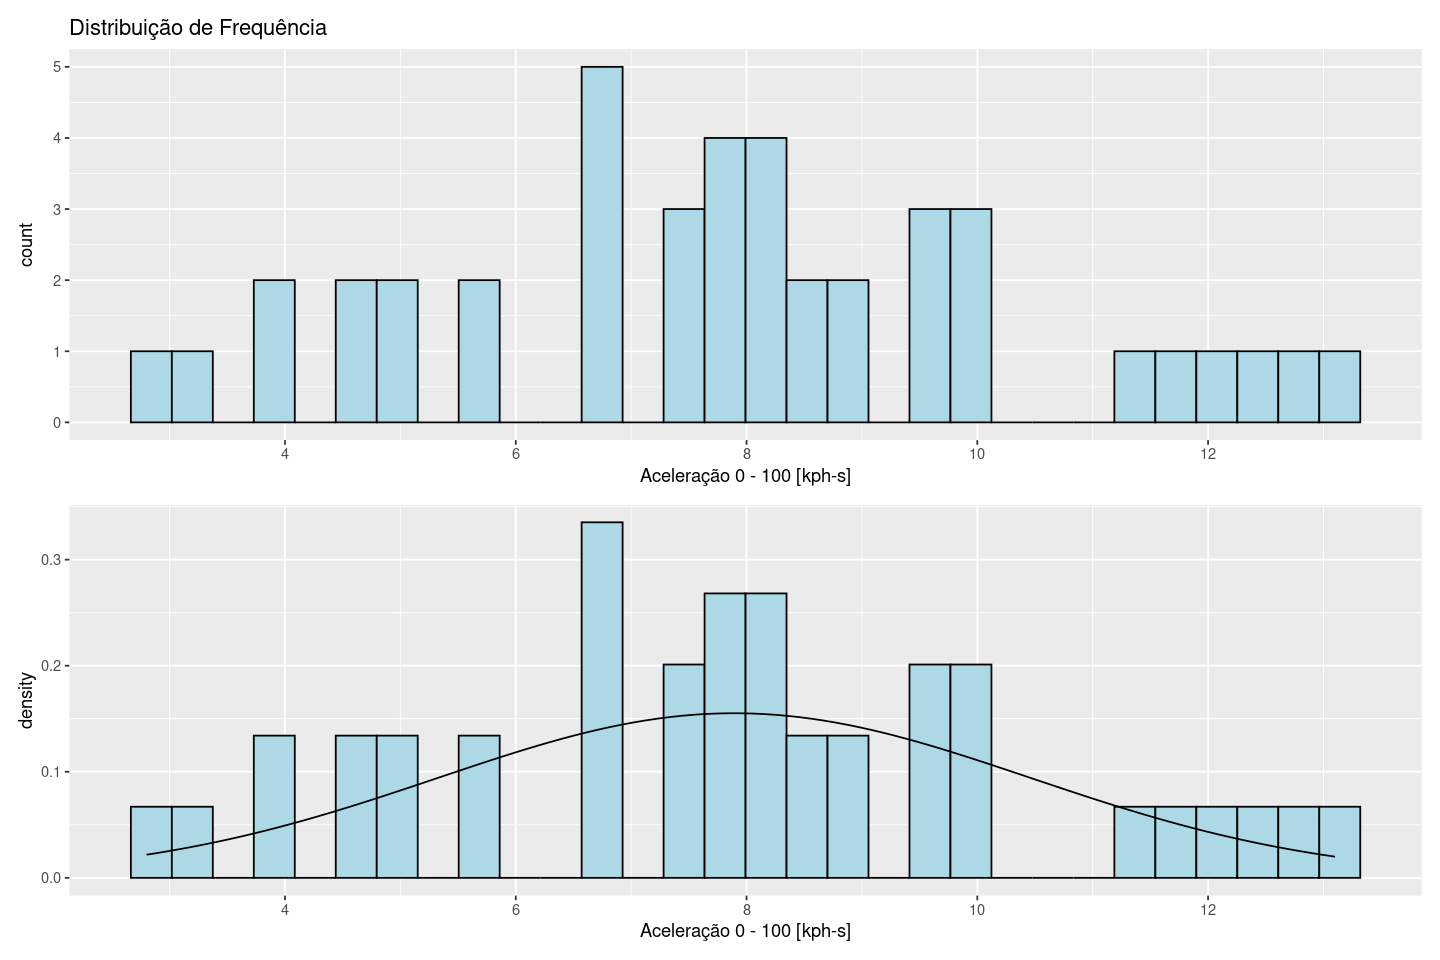

In [17]:
paste("Coeficiente de Assimetria = ", skewness(dados_limpos$Aceleracao))

g7 <- ggplot(dados_limpos) +
    aes(x=dados_limpos$Aceleracao) +
    geom_histogram(fill = "lightblue",
                   col = "black") +
    labs(x = "Aceleração 0 - 100 [kph-s]", title = "Distribuição de Frequência")

g8 <- ggplot(dados_limpos) +
    aes(x=dados_limpos$Aceleracao) +
    geom_histogram(fill = "lightblue",
                   col = "black",
                   aes(y=..density..)) +
                   labs(x = "Aceleração 0 - 100 [kph-s]") +
    stat_function(fun = dnorm, args = list(mean = mean(dados_limpos$Aceleracao), sd = sd(dados_limpos$Aceleracao)))

g7 / g8

Os gráficos, junto com o cálculo de $A_{p}$, nos ajudam a identificar como estão distribuídas as frequências das variáveis. Já foi possível notar, que as variáveis que verificamos logo acima, não apresentam uma distribuição normal.  
  
Vamos calcular $A_{p}$ de todas as nossas variáveis quantitativas.

In [18]:
paste("Coeficiente de Assimetria - Potência do Motor = ", skewness(dados_limpos$Potencia_Motor))
paste("Coeficiente de Assimetria - Torque Máximo = ", skewness(dados_limpos$Torque_Maximo))
paste("Coeficiente de Assimetria - Capacidade Bateria = ", skewness(dados_limpos$Capacidade_Bateria))
paste("Coeficiente de Assimetria - Rendimento = ", skewness(dados_limpos$Rendimento_WLTP))
paste("Coeficiente de Assimetria - Distância entre eixos = ", skewness(dados_limpos$Distancia_Entre_Eixos))
paste("Coeficiente de Assimetria - Comprimento = ", skewness(dados_limpos$Comprimento))
paste("Coeficiente de Assimetria - Largura = ", skewness(dados_limpos$Largura))
paste("Coeficiente de Assimetria - Altura = ", skewness(dados_limpos$Altura))
paste("Coeficiente de Assimetria - Peso Vazio Mínimo = ", skewness(dados_limpos$Peso_Vazio_Minimo))
paste("Coeficiente de Assimetria - Peso Bruto Admissível= ", skewness(dados_limpos$Peso_Bruto_Admissível))
paste("Coeficiente de Assimetria - Capacidade Carga Máxima = ", skewness(dados_limpos$Capacidade_Carga_Maxima))
paste("Coeficiente de Assimetria - Velocidade Máxima = ", skewness(dados_limpos$Velocidade_Maxima))
paste("Coeficiente de Assimetria - Espaço Porta-Mala = ", skewness(dados_limpos$Espaco_Porta_Mala))
paste("Coeficiente de Assimetria - Aceleração 0-100 = ", skewness(dados_limpos$Aceleracao))
paste("Coeficiente de Assimetria - Poder Carregamento Rápido = ", skewness(dados_limpos$Poder_Carregamento_Rapido))
paste("Coeficiente de Assimetria - Média Consumo Bateria = ", skewness(dados_limpos$Media_Consumo_Bateria))



[1] "Coeficiente de Assimetria - Potência do Motor =  1.19054417655704"

[1] "Coeficiente de Assimetria - Torque Máximo =  1.22873831005634"

[1] "Coeficiente de Assimetria - Capacidade Bateria =  0.196212348199299"

[1] "Coeficiente de Assimetria - Rendimento =  -0.237858364185574"

[1] "Coeficiente de Assimetria - Distância entre eixos =  -0.670495192854458"

[1] "Coeficiente de Assimetria - Comprimento =  -0.817859552201202"

[1] "Coeficiente de Assimetria - Largura =  2.57530222159506"

[1] "Coeficiente de Assimetria - Altura =  0.656336670652506"

[1] "Coeficiente de Assimetria - Peso Vazio Mínimo =  0.430870266179767"

[1] "Coeficiente de Assimetria - Peso Bruto Admissível=  0.282221866094233"

[1] "Coeficiente de Assimetria - Capacidade Carga Máxima =  1.69509842376608"

[1] "Coeficiente de Assimetria - Velocidade Máxima =  1.23161122053934"

[1] "Coeficiente de Assimetria - Espaço Porta-Mala =  0.323648716093277"

[1] "Coeficiente de Assimetria - Aceleração 0-100 =  0.0415631323442198"

[1] "Coeficiente de Assimetria - Poder Carregamento Rápido =  1.12656587342164"

[1] "Coeficiente de Assimetria - Média Consumo Bateria =  0.75735750390106"

A única variávei que apresenta uma distribuição mais próxima de uma distribuição normal, é a variável "Aceleração"; apresentando todas as outras, distribuições assimétricas.

### **2.2 - Correlações** ###

<div class="alert alert-block alert-warning">
<b>Nota:</b> a correlação entre dois eventos, não implica necessariamente uma relação de causalidade; ou seja, que um dos eventos tenha causado a ocorrência do outro!
</div>

[1] "Correlação:  0.824648430824744"

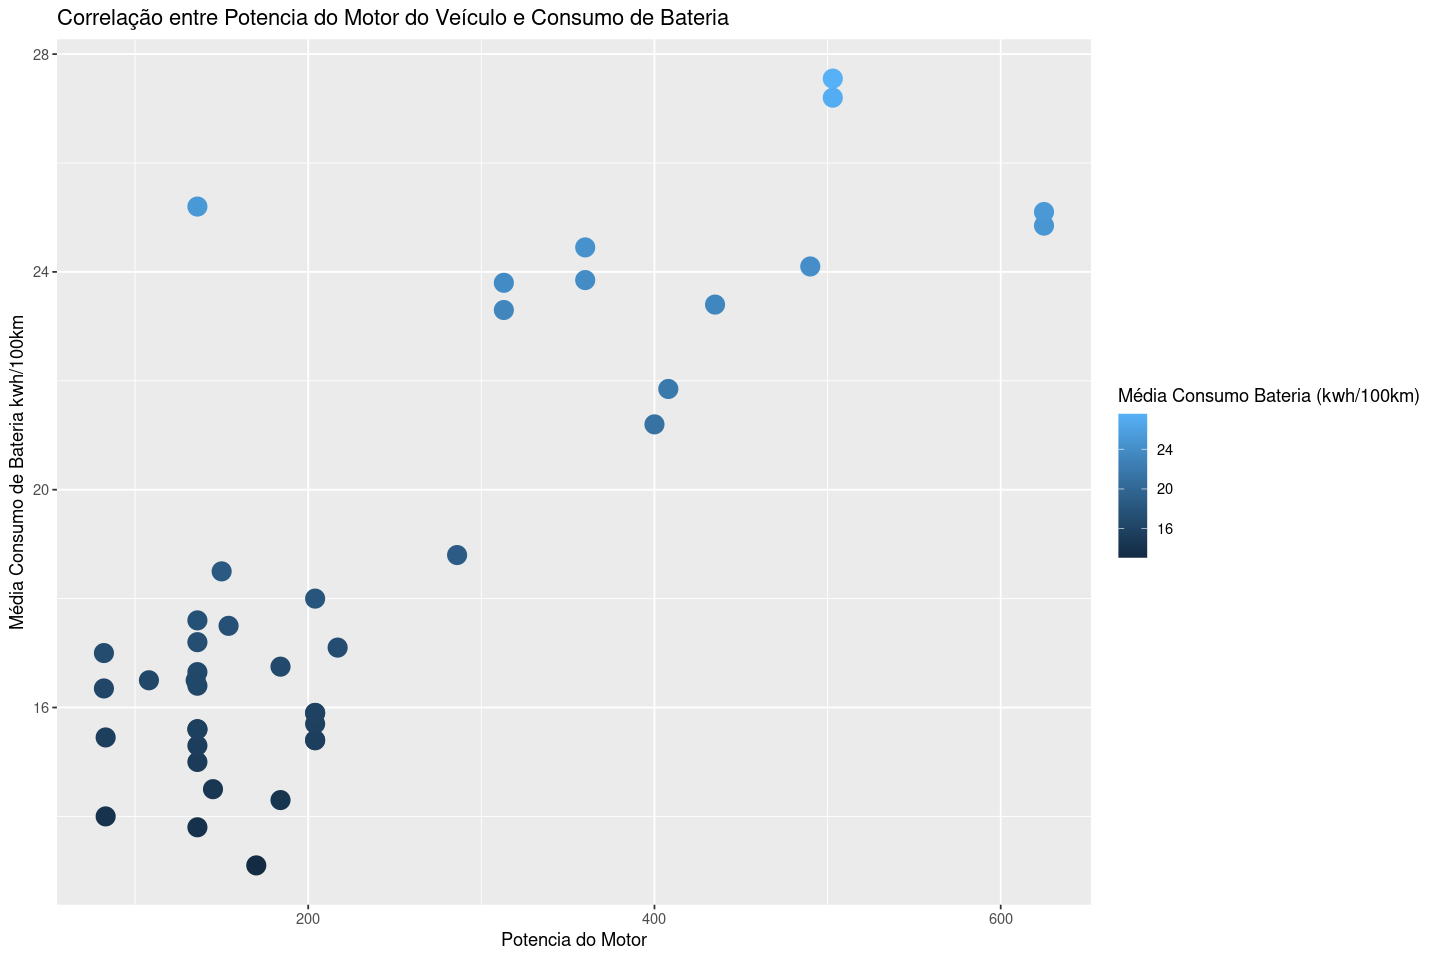

In [19]:
ggplot(dados_limpos, aes(x = Potencia_Motor, y = Media_Consumo_Bateria, 
       color = dados_limpos$Media_Consumo_Bateria)) +
  geom_point(size = 5) +
  labs(x = "Potencia do Motor",
       y = "Média Consumo de Bateria kwh/100km",
       title = "Correlação entre Potencia do Motor do Veículo e Consumo de Bateria",
       color = "Média Consumo Bateria (kwh/100km)")


paste("Correlação: ", cor(dados_limpos$Media_Consumo_Bateria, dados_limpos$Potencia_Motor))

Existe uma **correlação positiva** de 0.82 entre a Potência do Motor e Consumo de Bateria. Ou seja, existe uma relação diretamente proporcional entre potência do veículo com o consumo de bateria.

[1] "Correlação:  0.827639009484601"

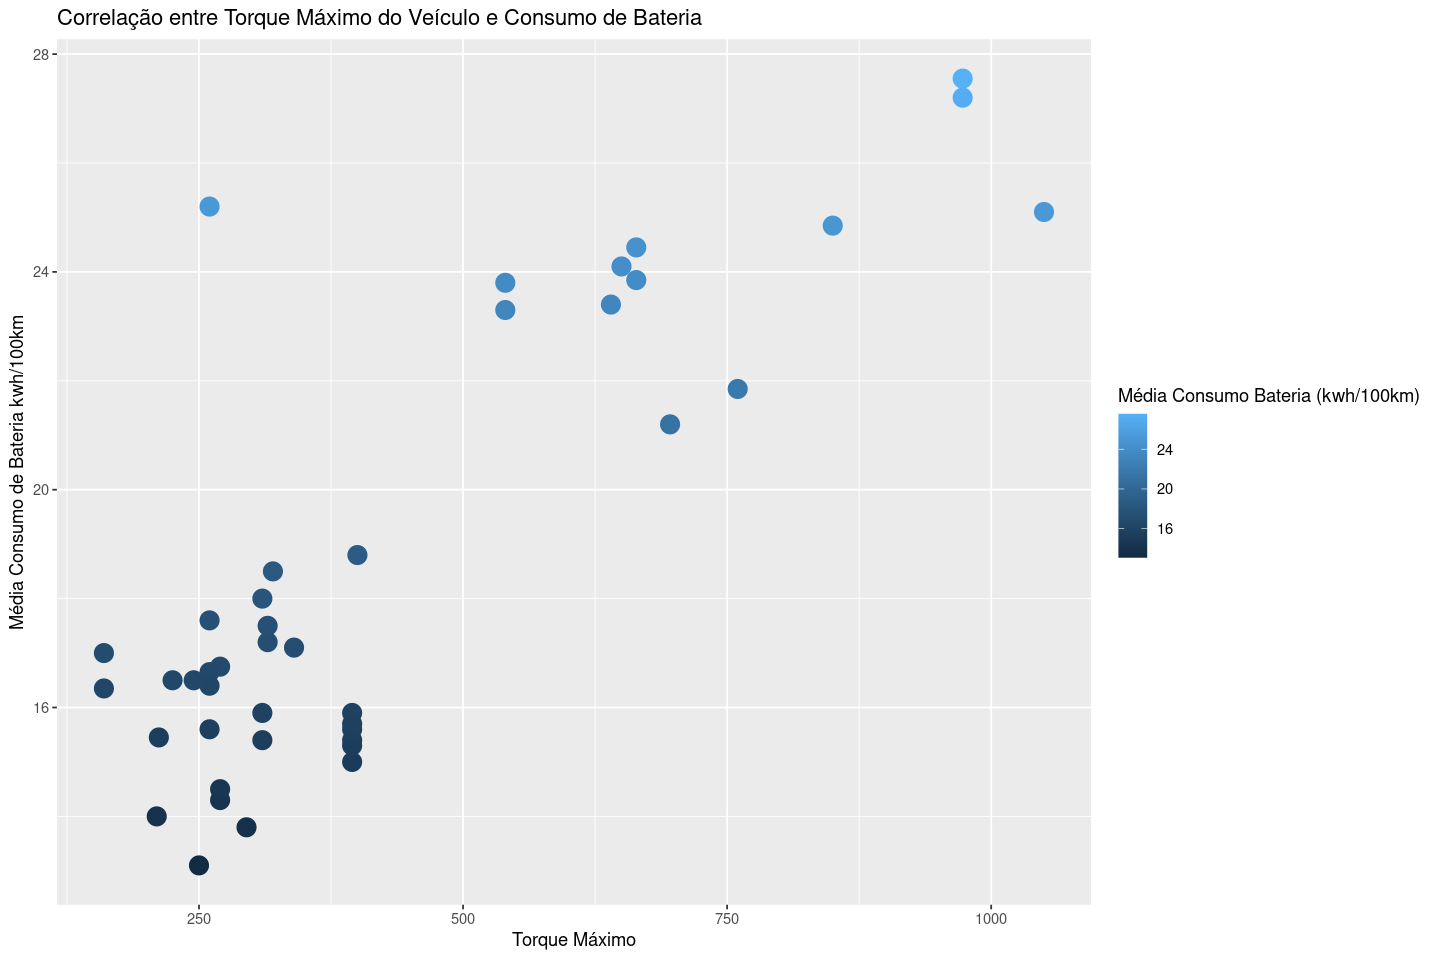

In [20]:
ggplot(dados_limpos, aes(x = Torque_Maximo, y = Media_Consumo_Bateria, 
       color = dados_limpos$Media_Consumo_Bateria)) +
  geom_point(size = 5) +
  labs(x = "Torque Máximo",
       y = "Média Consumo de Bateria kwh/100km",
       title = "Correlação entre Torque Máximo do Veículo e Consumo de Bateria",
       color = "Média Consumo Bateria (kwh/100km)")


paste("Correlação: ", cor(dados_limpos$Media_Consumo_Bateria, dados_limpos$Torque_Maximo))

Existe uma **correlação positiva** de 0.83 entre Toque Máximo e Consumo de Bateria. Ou seja, existe uma relação diretamente proporcional entre o torque máximo do motor do veículo com o consumo de bateria.

[1] "Correlação:  0.730469647224742"

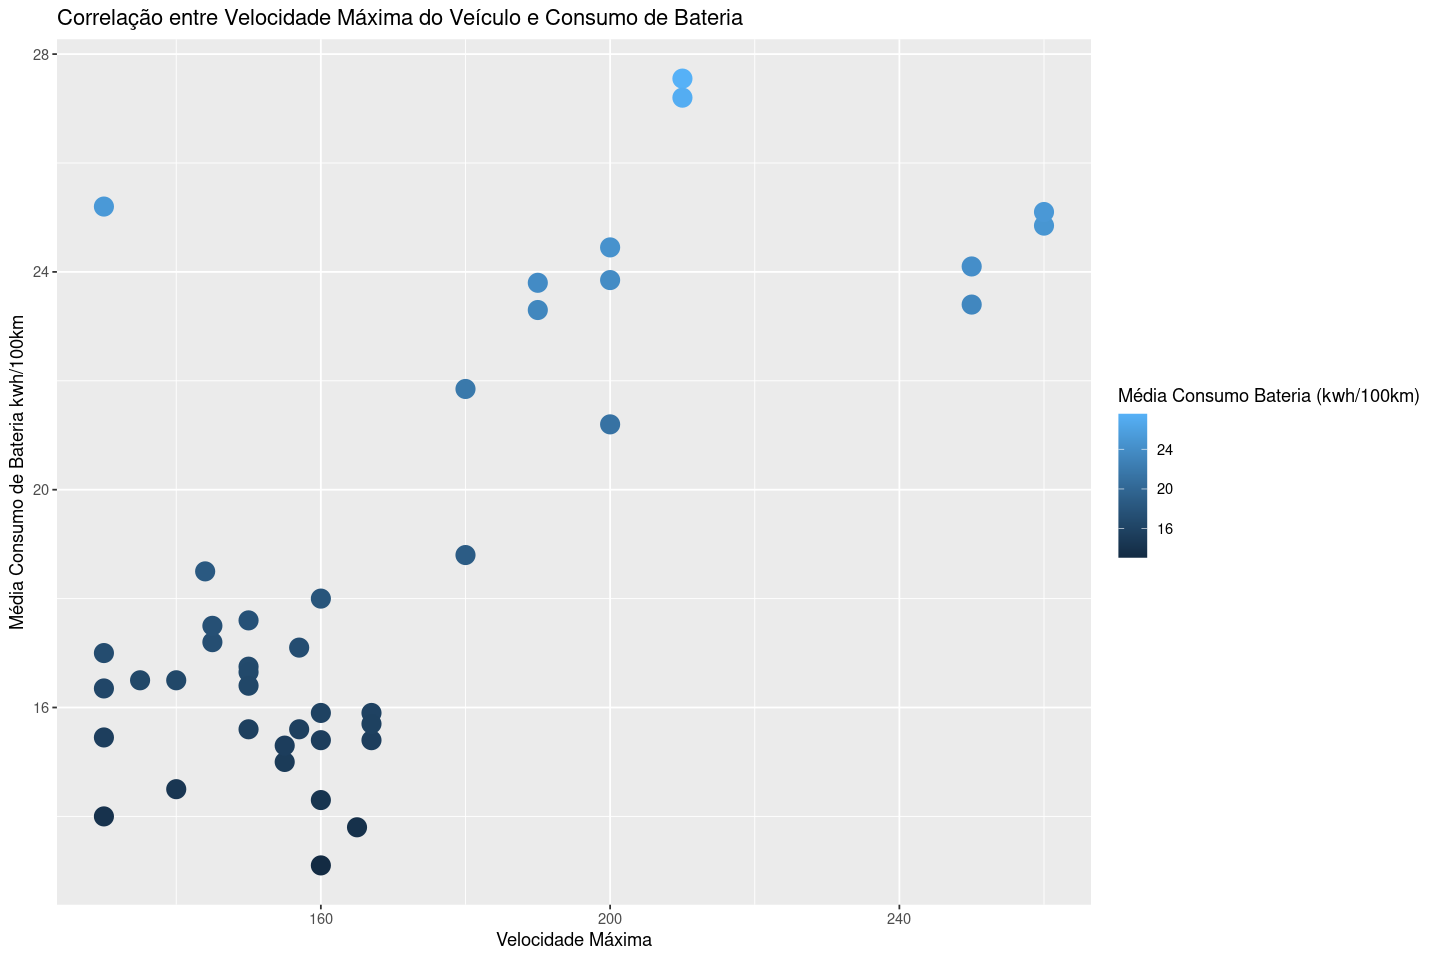

In [21]:
ggplot(dados_limpos, aes(x = Velocidade_Maxima, y = Media_Consumo_Bateria, 
       color = dados_limpos$Media_Consumo_Bateria)) +
  geom_point(size = 5) +
  labs(x = "Velocidade Máxima",
       y = "Média Consumo de Bateria kwh/100km",
       title = "Correlação entre Velocidade Máxima do Veículo e Consumo de Bateria",
       color = "Média Consumo Bateria (kwh/100km)")


paste("Correlação: ", cor(dados_limpos$Media_Consumo_Bateria, dados_limpos$Velocidade_Maxima))

Existe uma **correlação positiva** de 0.73 entre a Velocidade Máxima e Consumo de Bateria. Ou seja, existe uma relação diretamente proporcional entre a velocidade máxima que o veículo pode atingir com o consumo de bateria.

[1] "Correlação:  -0.626844767897822"

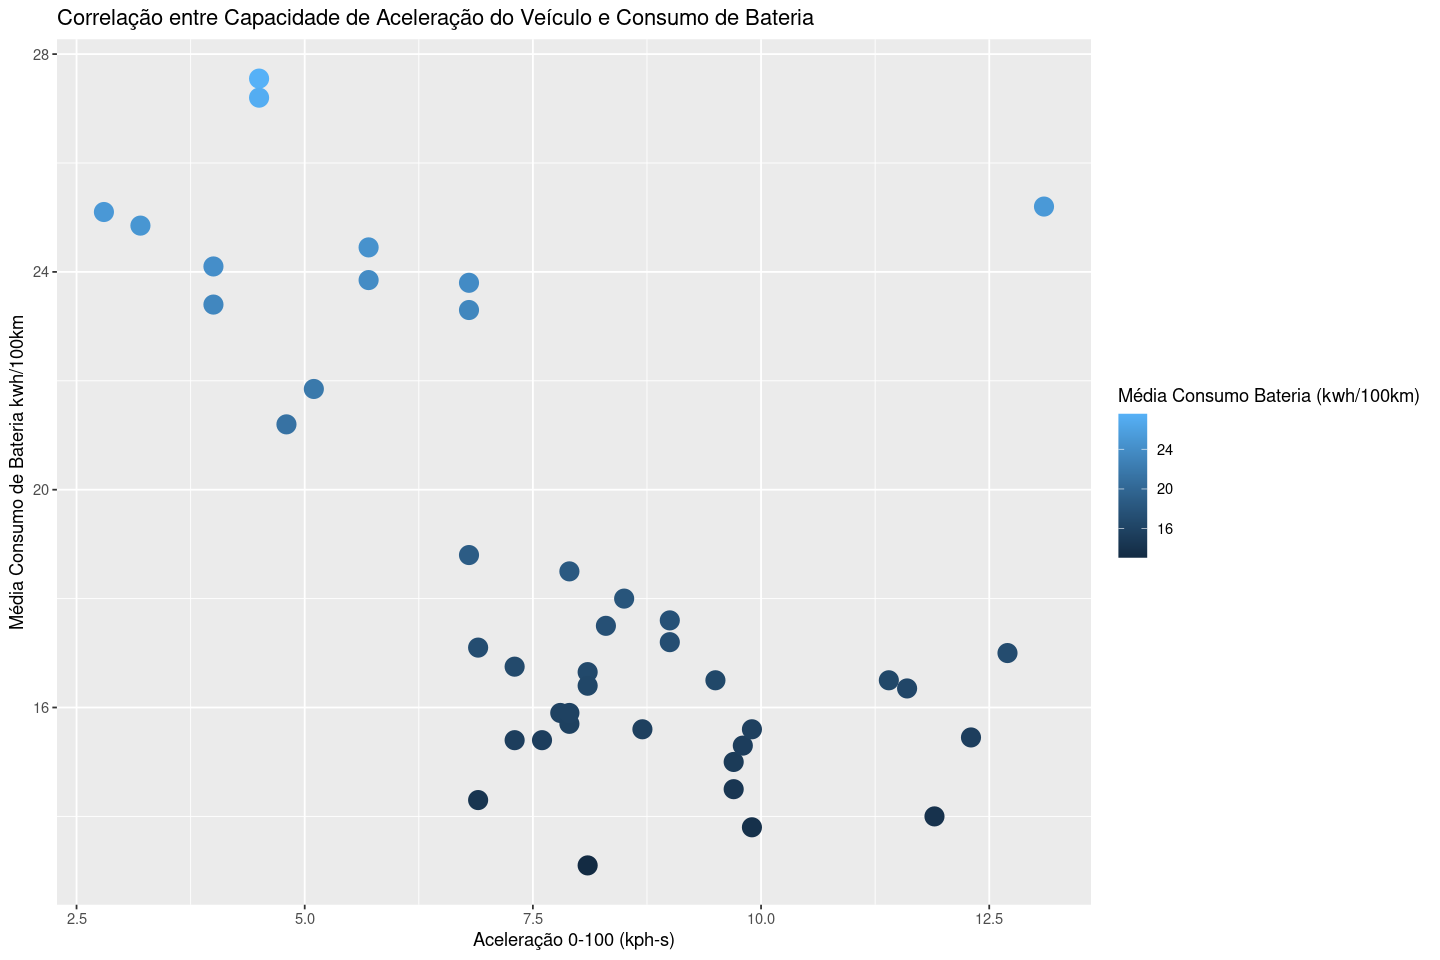

In [22]:
ggplot(dados_limpos, aes(x = Aceleracao, y = Media_Consumo_Bateria, 
       color = dados_limpos$Media_Consumo_Bateria)) +
  geom_point(size = 5) +
  labs(x = "Aceleração 0-100 (kph-s)",
       y = "Média Consumo de Bateria kwh/100km",
       title = "Correlação entre Capacidade de Aceleração do Veículo e Consumo de Bateria",
       color = "Média Consumo Bateria (kwh/100km)")


paste("Correlação: ", cor(dados_limpos$Media_Consumo_Bateria, dados_limpos$Aceleracao))

Existe uma **correlação negativa** de -0.63 entre a Capacidade de Aceleração do Veículo e Consumo de Bateria. Ou seja, existe uma relação inversamente proporcional entre o tempo a capacidade de aceleração com o consumo de bateria.

[1] "Correlação:  0.861909522725145"

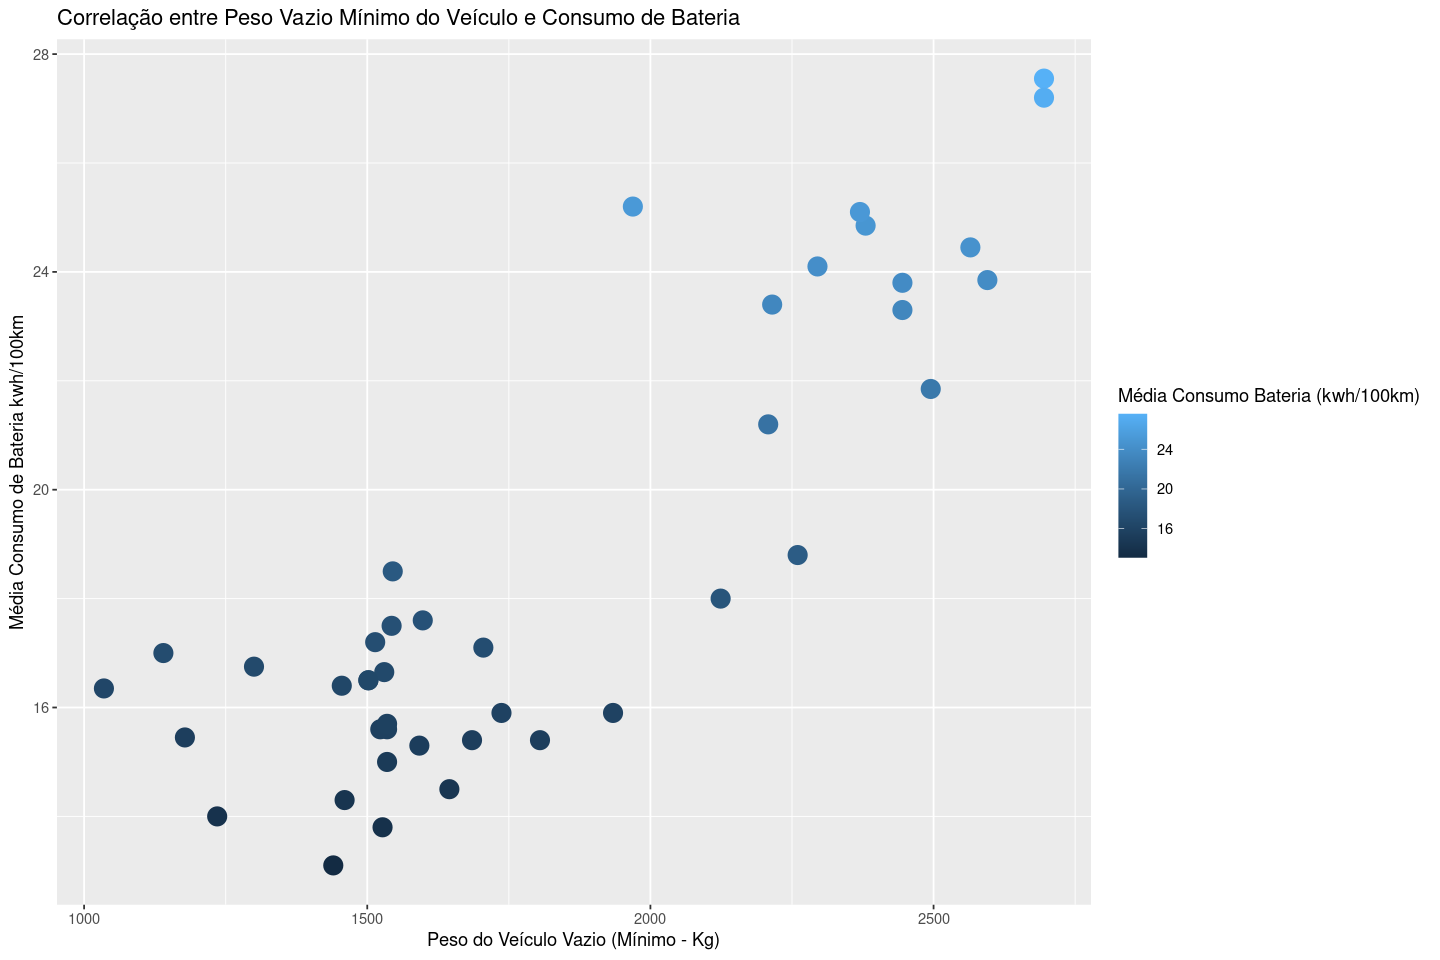

In [23]:
ggplot(dados_limpos, aes(x = Peso_Vazio_Minimo, y = Media_Consumo_Bateria, 
       color = dados_limpos$Media_Consumo_Bateria)) +
  geom_point(size = 5) +
  labs(x = "Peso do Veículo Vazio (Mínimo - Kg)",
       y = "Média Consumo de Bateria kwh/100km",
       title = "Correlação entre Peso Vazio Mínimo do Veículo e Consumo de Bateria",
       color = "Média Consumo Bateria (kwh/100km)")


paste("Correlação: ", cor(dados_limpos$Media_Consumo_Bateria, dados_limpos$Peso_Vazio_Minimo))

Existe uma **correlação positiva** de 0.86 entre o Peso Mínimo do Veículo quando vazio e o Consumo de Bateria. Ou seja, existe uma relação diretamente proporcional entre o Peso Mínimo do Veículo com o consumo de bateria.

[1] "Correlação:  0.721075542991031"

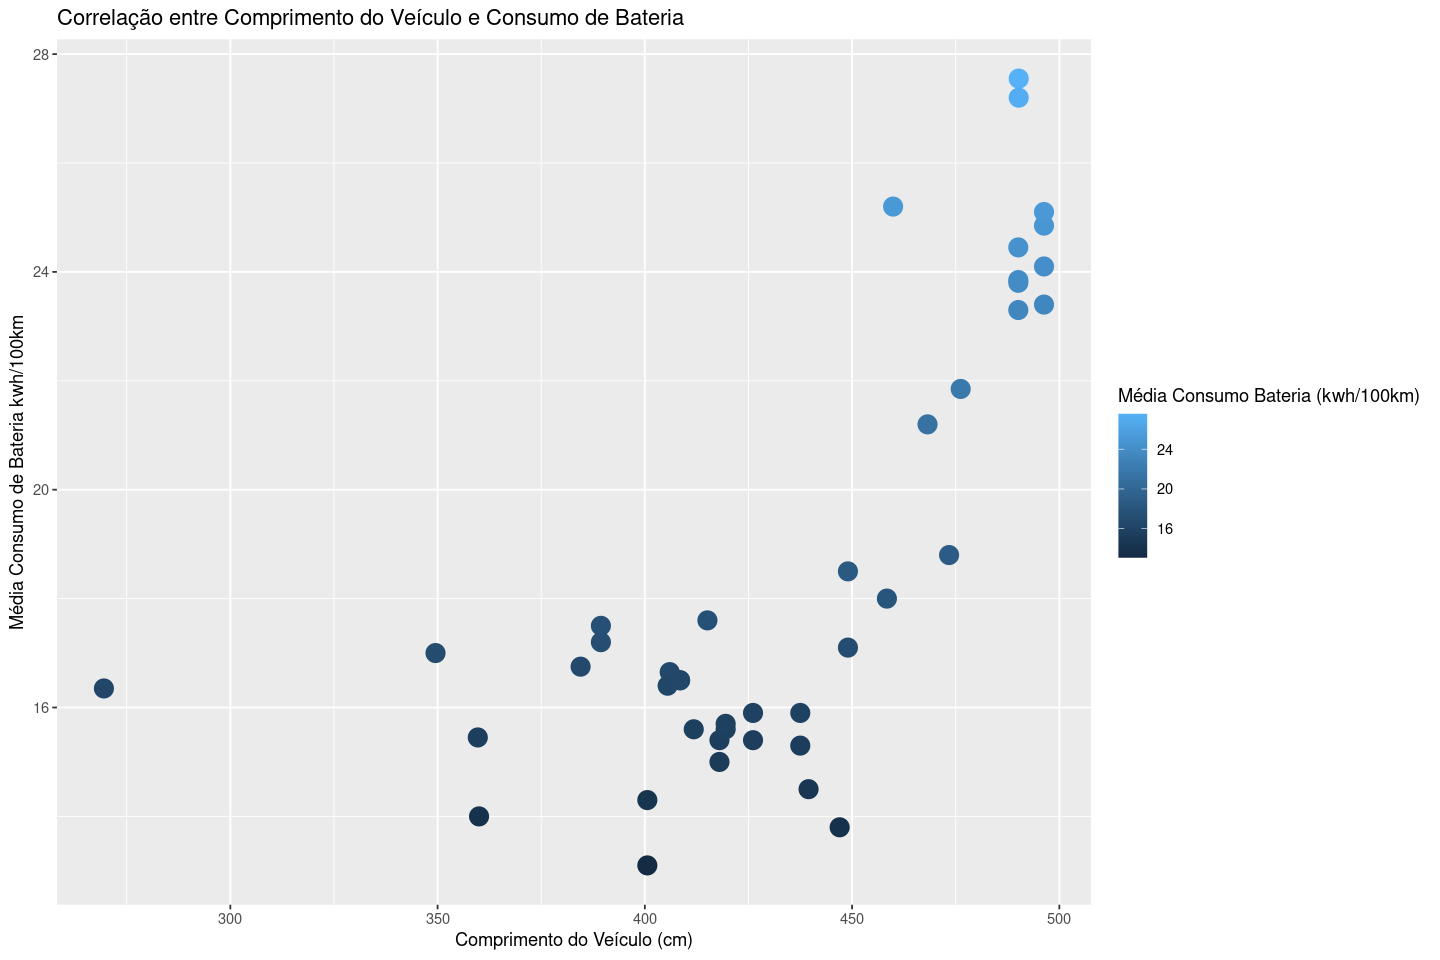

In [24]:
ggplot(dados_limpos, aes(x = Comprimento, y = Media_Consumo_Bateria, 
       color = dados_limpos$Media_Consumo_Bateria)) +
  geom_point(size = 5) +
  labs(x = "Comprimento do Veículo (cm)",
       y = "Média Consumo de Bateria kwh/100km",
       title = "Correlação entre Comprimento do Veículo e Consumo de Bateria",
       color = "Média Consumo Bateria (kwh/100km)")


paste("Correlação: ", cor(dados_limpos$Media_Consumo_Bateria, dados_limpos$Comprimento))

Existe uma **correlação positiva** de 0.72 entre o Comprimento do Veículo e Consumo de Bateria. Ou seja, existe uma relação diretamente proporcional entre o comprimento do veículo com o consumo de bateria.

[1] "Correlação:  0.709328384307658"

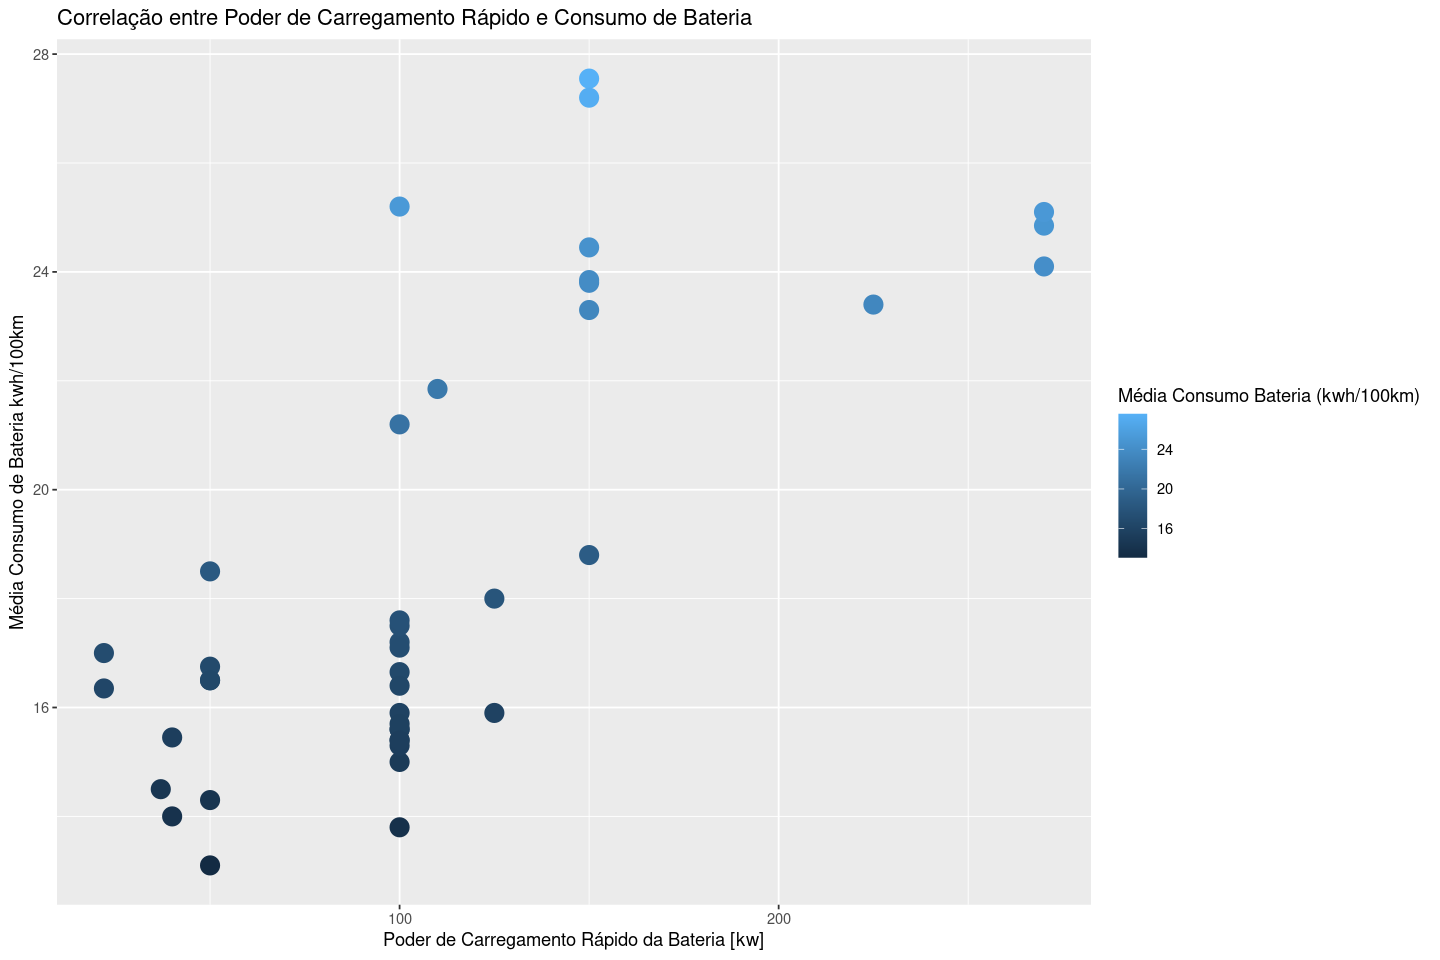

In [25]:
ggplot(dados_limpos, aes(x = Poder_Carregamento_Rapido, y = Media_Consumo_Bateria, 
       color = dados_limpos$Media_Consumo_Bateria)) +
  geom_point(size = 5) +
  labs(x = "Poder de Carregamento Rápido da Bateria [kw]",
       y = "Média Consumo de Bateria kwh/100km",
       title = "Correlação entre Poder de Carregamento Rápido e Consumo de Bateria",
       color = "Média Consumo Bateria (kwh/100km)")


paste("Correlação: ", cor(dados_limpos$Media_Consumo_Bateria, dados_limpos$Poder_Carregamento_Rapido))

Existe uma **correlação positiva** de 0.71 entre o Poder de Carregamento Rápido da Bateria e Consumo de Bateria. Ou seja, existe uma relação diretamente proporcional entre o poder de carregamento da bateria com o consumo de bateria.

[1] "Correlação:  0.716478121529188"

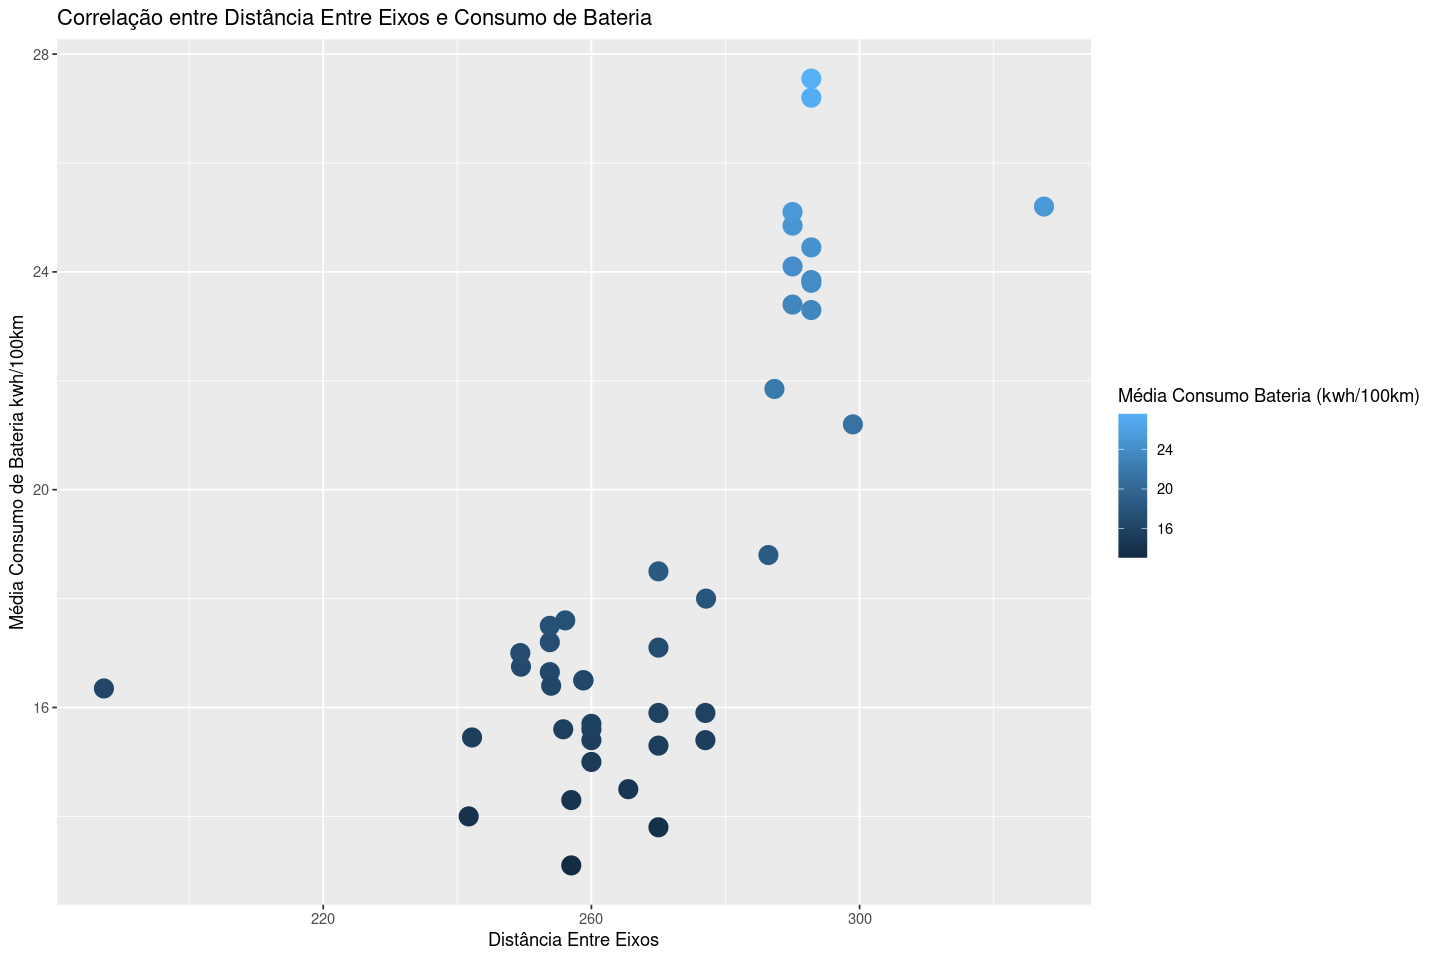

In [26]:
ggplot(dados_limpos, aes(x = Distancia_Entre_Eixos, y = Media_Consumo_Bateria, 
       color = dados_limpos$Media_Consumo_Bateria)) +
  geom_point(size = 5) +
  labs(x = "Distância Entre Eixos",
       y = "Média Consumo de Bateria kwh/100km",
       title = "Correlação entre Distância Entre Eixos e Consumo de Bateria",
       color = "Média Consumo Bateria (kwh/100km)")


paste("Correlação: ", cor(dados_limpos$Media_Consumo_Bateria, dados_limpos$Distancia_Entre_Eixos))

Existe uma **correlação positiva** de 0.72 entre a Distância Entre Eixos e Consumo de Bateria. Ou seja, existe uma relação diretamente proporcional entre o tamanho do veículo com o consumo de bateria.

Analisando apenas as correlações que realizamos acima; podemos concluir que existe um relacionamento importante entre as características técnicas que tornam o motor do carro mais "possante" com um consumo maior de bateria. Também é possível verificar que existe uma relação entre o tamanho do veículo e o consumo de bateria, além do forte relcaionamento diretamente porporcional do poder de carga rápida da bateria sobre o consumo da mesma!  
  
Vale ressaltar que as correlações destacadas acima, podem estar sofrendo interferência também de outras variáveis; isto é, outras características técnicas do veículo. **Reiterando**: *correlação não implica causalidade!*.

### **2.3 - Mapa de Correlações**

Para finalizar esta etapa de análise exploratória dos dados, vamos construir uma matriz de correlação entre as variáveis numéricas e plotar um gráfico representando esta matriz.  
Esta matriz de correlações, auxiliará na compreensão de como uma determinada característica do veículo está relacionada com outra.

In [27]:
colunas_numericas <- sapply(dados_limpos, is.numeric)

dataset_correlacao <- cor(dados_limpos[ ,colunas_numericas])
head(dataset_correlacao, n=5)

,Preco_Minimo_Bruto,Potencia_Motor,Torque_Maximo,Capacidade_Bateria,Rendimento_WLTP,Distancia_Entre_Eixos,Comprimento,Largura,Altura,Peso_Vazio_Minimo,Peso_Bruto_Admissível,Capacidade_Carga_Maxima,Tamanho_Pneu,Velocidade_Maxima,Espaco_Porta_Mala,Aceleracao,Poder_Carregamento_Rapido,Media_Consumo_Bateria
Preco_Minimo_Bruto,1.0000000,0.9609095,0.9026944,0.7940807,0.4577102,0.6243537,0.7347522,0.4762177,-0.23587726,0.7867075,0.7677604,0.4750686,0.7502415,0.9438116,0.5759475,-0.8109904,0.8877193,0.7994474
Potencia_Motor,0.9609095,1.0000000,0.9520621,0.8685206,0.5370076,0.6449838,0.7731565,0.4718722,-0.19381690,0.8553341,0.8150728,0.4327080,0.8009777,0.9516828,0.6442736,-0.8966936,0.8540771,0.8246484
Torque_Maximo,0.9026944,0.9520621,1.0000000,0.8318944,0.4503051,0.6350609,0.7609289,0.4570550,-0.09238988,0.8587993,0.8037828,0.3905991,0.7498022,0.8776439,0.6761822,-0.8324169,0.7708090,0.8276390
Capacidade_Bateria,0.7940807,0.8685206,0.8318944,1.0000000,0.8092553,0.7446020,0.8418368,0.5247067,0.04163423,0.9209651,0.8850111,0.5075390,0.7882109,0.8238711,0.7942388,-0.8194025,0.7889018,0.7578657
Rendimento_WLTP,0.4577102,0.5370076,0.4503051,0.8092553,1.0000000,0.5075445,0.6044038,0.3366901,-0.01124270,0.5913838,0.5497372,0.2736420,0.6188445,0.5611077,0.5088502,-0.6276312,0.5512162,0.2744891


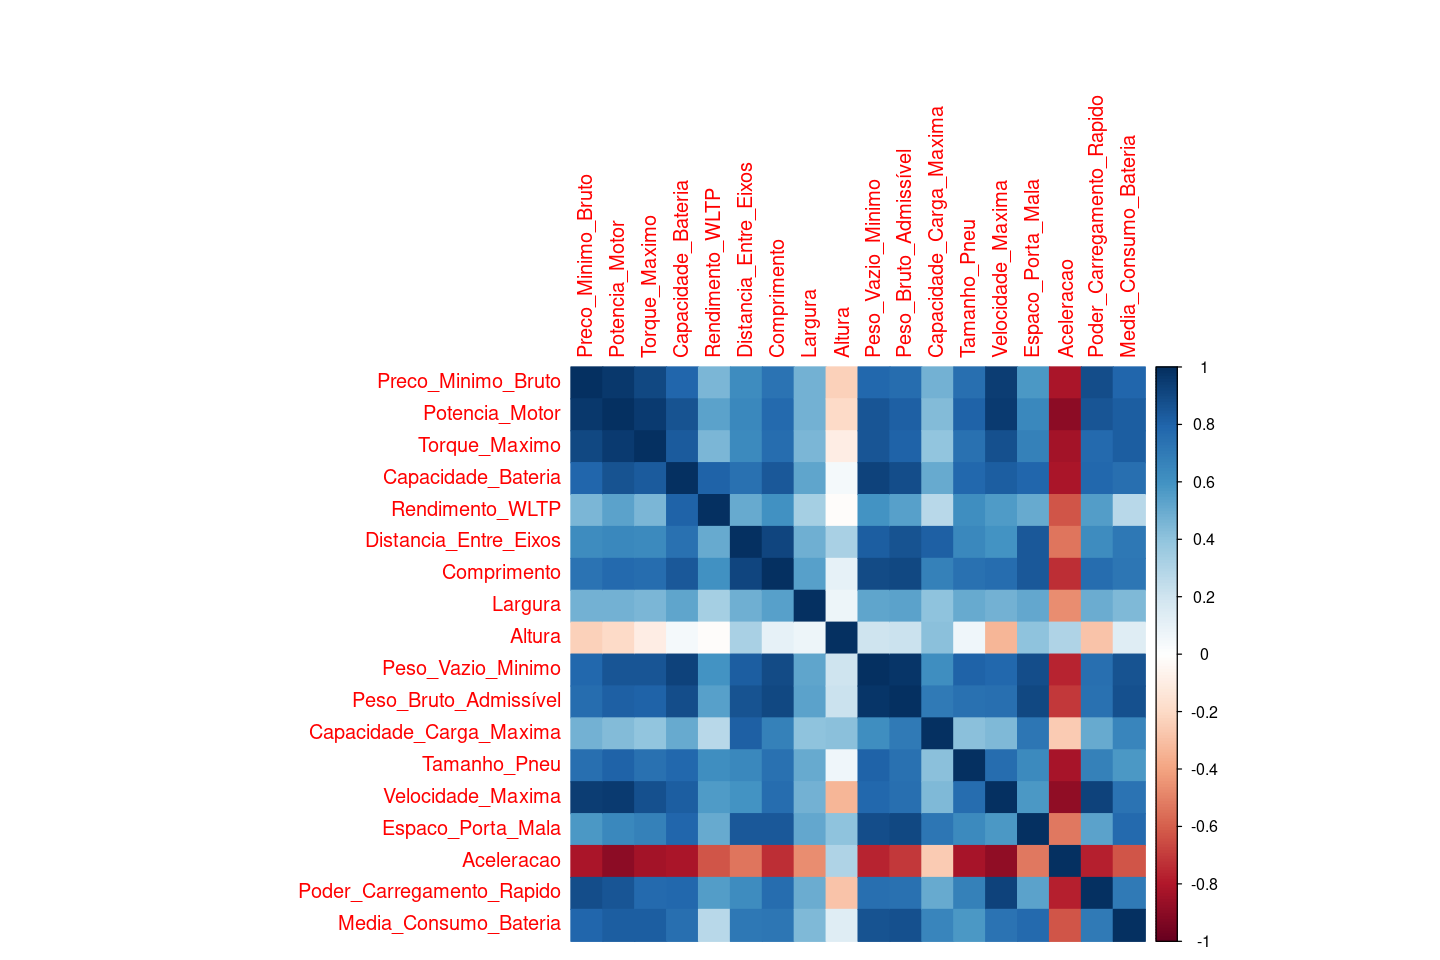

In [28]:
corrplot(dataset_correlacao, method = "color")


De acordo com a matriz de correlação acima, com exceção das variáveis "Rendimento WLTP", "Largura", "Altura" e "Tamanho Pneu"; todas as outras mostram uma forte correlação com a média do consumo de bateria.  
Vamos conseguir determinar com mais exatidão, na próxima etapa com as construções dos modelos de Machine Learning!

## **3. Machine Learning** 

Antes de iniciar propriamente as construções e treinamentos de modelos, é necessário levantar uma situação problemática que fora identificada logo no início do projeto, mas que foi omitida na documentação até este momento: **temos poucos dados para treinar os algoritmos de Machine Learning!**

Treinar modelos apenas com os dados que estão disponíveis, é provável que ocorra *overfitting*. Ou seja, é provável que o modelo (*ou os modelos*) decore os dados de treino e não seja capaz de generalizar para outros dados nunca vistos antes! Ainda, com outras palavras; se basearmos o treinamento dos modelos somente com os dados que temos até agora, este projeto não será escalável!  
  
Para demonstração e comparação, vamos criar um modelo de regressão linear com os nossos dados disponíveis até o momento.
  

In [29]:
# Separando apenas as variáveis numéricas
dados_numericos <- dados_limpos[ , colunas_numericas]

head(dados_numericos, n=3)

,Preco_Minimo_Bruto,Potencia_Motor,Torque_Maximo,Capacidade_Bateria,Rendimento_WLTP,Distancia_Entre_Eixos,Comprimento,Largura,Altura,Peso_Vazio_Minimo,Peso_Bruto_Admissível,Capacidade_Carga_Maxima,Tamanho_Pneu,Velocidade_Maxima,Espaco_Porta_Mala,Aceleracao,Poder_Carregamento_Rapido,Media_Consumo_Bateria
,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>
1,345700,360,664,95,438,292.8,490.1,193.5,162.9,2565,3130,640,19,200,660,5.7,150,24.45
2,308400,313,540,71,340,292.8,490.1,193.5,162.9,2445,3040,670,19,190,660,6.8,150,23.80
3,414900,503,973,95,364,292.8,490.2,197.6,162.9,2695,3130,565,20,210,660,4.5,150,27.55


In [30]:
# Criando índice para treino e teste
amostra <- sample.split(dados_numericos$Torque_Maximo, SplitRatio = 0.70)

treino = subset(dados_numericos, amostra == TRUE) #70% dos dados
teste = subset(dados_numericos, amostra == FALSE) #30% dos dados


**Construindo primeiro modelo do projeto:**


In [31]:
modelo_v1 <- lm(Media_Consumo_Bateria ~ ., treino)

In [32]:
summary(modelo_v1)


Call:
lm(formula = Media_Consumo_Bateria ~ ., data = treino)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47856 -0.26111  0.05811  0.39122  1.28596 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)   
(Intercept)                2.386e+01  1.915e+01   1.246  0.23859   
Preco_Minimo_Bruto        -8.961e-07  8.972e-06  -0.100  0.92224   
Potencia_Motor             1.778e-02  1.770e-02   1.005  0.33671   
Torque_Maximo             -5.001e-03  6.010e-03  -0.832  0.42302   
Capacidade_Bateria         2.218e-01  8.914e-02   2.489  0.03011 * 
Rendimento_WLTP           -3.545e-02  1.023e-02  -3.465  0.00528 **
Distancia_Entre_Eixos     -6.174e-03  4.880e-02  -0.127  0.90161   
Comprimento                1.592e-02  3.050e-02   0.522  0.61214   
Largura                   -1.846e-02  1.634e-02  -1.130  0.28256   
Altura                    -3.622e-02  1.032e-01  -0.351  0.73224   
Peso_Vazio_Minimo          6.100e-04  5.173e-03   0.118  0.90826   
Pes

O primeiro modelo, utilizando todas as variáveis preditoras, atingiu um $R^{2}$ ajustado de 94%; ou seja: esta medida significa que **93% da variação de consumo da bateria dos veículos elétricos, pode ser explicada pelas variáveis preditoras do nosso dataset**!  
  
Este resultado é questionável, pelo motivo que foi destacado anteriormente: o quantidade de dados é pequena para obtermos resultados confiáveis!  
  
Podemos realizar um teste de previsão com os dados de teste:

In [33]:
previsao_v1 <- predict(modelo_v1, teste)
resultados <- cbind(previsao_v1, teste$Media_Consumo_Bateria)
resultados <- as.data.frame(resultados)
nomes_resultados <- list("Consumo Previsto", "Consumo Real")
colnames(resultados) <- nomes_resultados

resultados

,Consumo Previsto,Consumo Real
,<dbl>,<dbl>
1,24.75227,24.45
9,20.61007,18.80
18,15.29148,15.30
19,15.71946,15.90
22,19.53364,14.50
28,17.12178,17.60
29,17.05578,16.40
32,24.33062,24.10
33,24.95363,24.85


### **3.1 - Gerando Dados Sintéticos**

Neste projeto, diante do problema da pequena quantidade de dados reais obtidos, será adotada a prática da geração de dados sintéticos. Ou seja, será gerada uma nova massa de dados à partir dos dados reais disponívels.  
  
Com a linguagem R, este procedimento pode ser realizado através do pacote *synthpop*.  
Será utilizada a função *syn()*, que por default, cria uma massa de dados utilizando o método "cart" *(função rpart)* para todas as variáveis, exceto a primeira variável (primeira coluna) cujos valores sao gerados por amostragem aleatória com substituição dos dados originais.

In [34]:
library(synthpop)
# Criando 2000 dados sintéticos
sinteticos <- syn(dados_numericos, k = 2000)


novo_dataset <- as.data.frame(sinteticos[3])
head(novo_dataset)


Find out more at https://www.synthpop.org.uk/



CAUTION: Your data set has fewer observations (42) than we advise.
We suggest that there should be at least 280 observations
(100 + 10 * no. of variables used in modelling the data).
Please check your synthetic data carefully with functions
compare(), utility.tab(), and utility.gen().

Sample(s) of size 2000 will be generated from original data of size 42.


Synthesis
-----------
 Preco_Minimo_Bruto Potencia_Motor Torque_Maximo Capacidade_Bateria Rendimento_WLTP Distancia_Entre_Eixos Comprimento Largura Altura Peso_Vazio_Minimo
 Peso_Bruto_Admissível Capacidade_Carga_Maxima Tamanho_Pneu Velocidade_Maxima Espaco_Porta_Mala Aceleracao Poder_Carregamento_Rapido Media_Consumo_Bateria


,syn.Preco_Minimo_Bruto,syn.Potencia_Motor,syn.Torque_Maximo,syn.Capacidade_Bateria,syn.Rendimento_WLTP,syn.Distancia_Entre_Eixos,syn.Comprimento,syn.Largura,syn.Altura,syn.Peso_Vazio_Minimo,syn.Peso_Bruto_Admissível,syn.Capacidade_Carga_Maxima,syn.Tamanho_Pneu,syn.Velocidade_Maxima,syn.Espaco_Porta_Mala,syn.Aceleracao,syn.Poder_Carregamento_Rapido,syn.Media_Consumo_Bateria
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,202390,204,395,64.0,425,299.0,426.1,193.5,161.6,2124,2810,640,16,160,315,8.3,100,21.20
2,152900,108,225,50.0,230,249.4,359.7,164.5,153.2,1300,1770,290,15,130,260,11.4,50,16.65
3,179990,136,250,50.0,337,249.5,359.7,179.1,151.2,1140,1530,445,16,157,171,9.8,22,15.60
4,122900,83,225,17.6,258,249.4,349.5,166.5,143.2,1035,1310,290,15,140,171,8.7,50,14.50
5,139900,136,320,39.2,260,260.0,415.1,180.0,159.0,1592,2280,540,20,145,310,9.5,37,17.50
6,184500,217,310,80.0,414,260.0,415.1,180.9,160.5,1737,2230,490,19,180,451,5.7,125,15.30


In [35]:
#Renomeando as colunas do Dataset dos dados sintéticos
nomes_colunas2<- list("Preco_Minimo_Bruto", "Potencia_Motor", "Torque_Maximo", "Capacidade_Bateria", "Rendimento_WLTP", "Distancia_Entre_Eixos", "Comprimento", 
                      "Largura", "Altura", "Peso_Vazio_Minimo", "Peso_Bruto_Admissível", "Capacidade_Carga_Maxima",
                      "Tamanho_Pneu", "Velocidade_Maxima", "Espaco_Porta_Mala", "Aceleracao", "Poder_Carregamento_Rapido", "Media_Consumo_Bateria")

colnames(novo_dataset) <- nomes_colunas2
head(novo_dataset, n = 3)

# Salvando o Dataset gerado
write.table(novo_dataset, file = "/home/ranieri/Desktop/Projeto-Carros-Eletricos/Datasets_Criados/Dados_Sinteticos.csv", sep = ",", col.names = TRUE, row.names = FALSE)

,Preco_Minimo_Bruto,Potencia_Motor,Torque_Maximo,Capacidade_Bateria,Rendimento_WLTP,Distancia_Entre_Eixos,Comprimento,Largura,Altura,Peso_Vazio_Minimo,Peso_Bruto_Admissível,Capacidade_Carga_Maxima,Tamanho_Pneu,Velocidade_Maxima,Espaco_Porta_Mala,Aceleracao,Poder_Carregamento_Rapido,Media_Consumo_Bateria
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,202390,204,395,64,425,299.0,426.1,193.5,161.6,2124,2810,640,16,160,315,8.3,100,21.20
2,152900,108,225,50,230,249.4,359.7,164.5,153.2,1300,1770,290,15,130,260,11.4,50,16.65
3,179990,136,250,50,337,249.5,359.7,179.1,151.2,1140,1530,445,16,157,171,9.8,22,15.60


Podemos comparar os dados gerados com os dados originais, utilizando a função "compare.data.frame", que pertence à biblioteca synthpop.


Comparing percentages observed with synthetic

Press return for next variable(s): 
Selected utility measures:
                       pMSE   S_pMSE df
Preco_Minimo_Bruto    2e-06 2.266931  4
Aceleracao            1e-06 1.738005  4
Potencia_Motor        2e-06 2.522785  4
Media_Consumo_Bateria 1e-06 1.824514  4
Distancia_Entre_Eixos 1e-06 0.623379  4

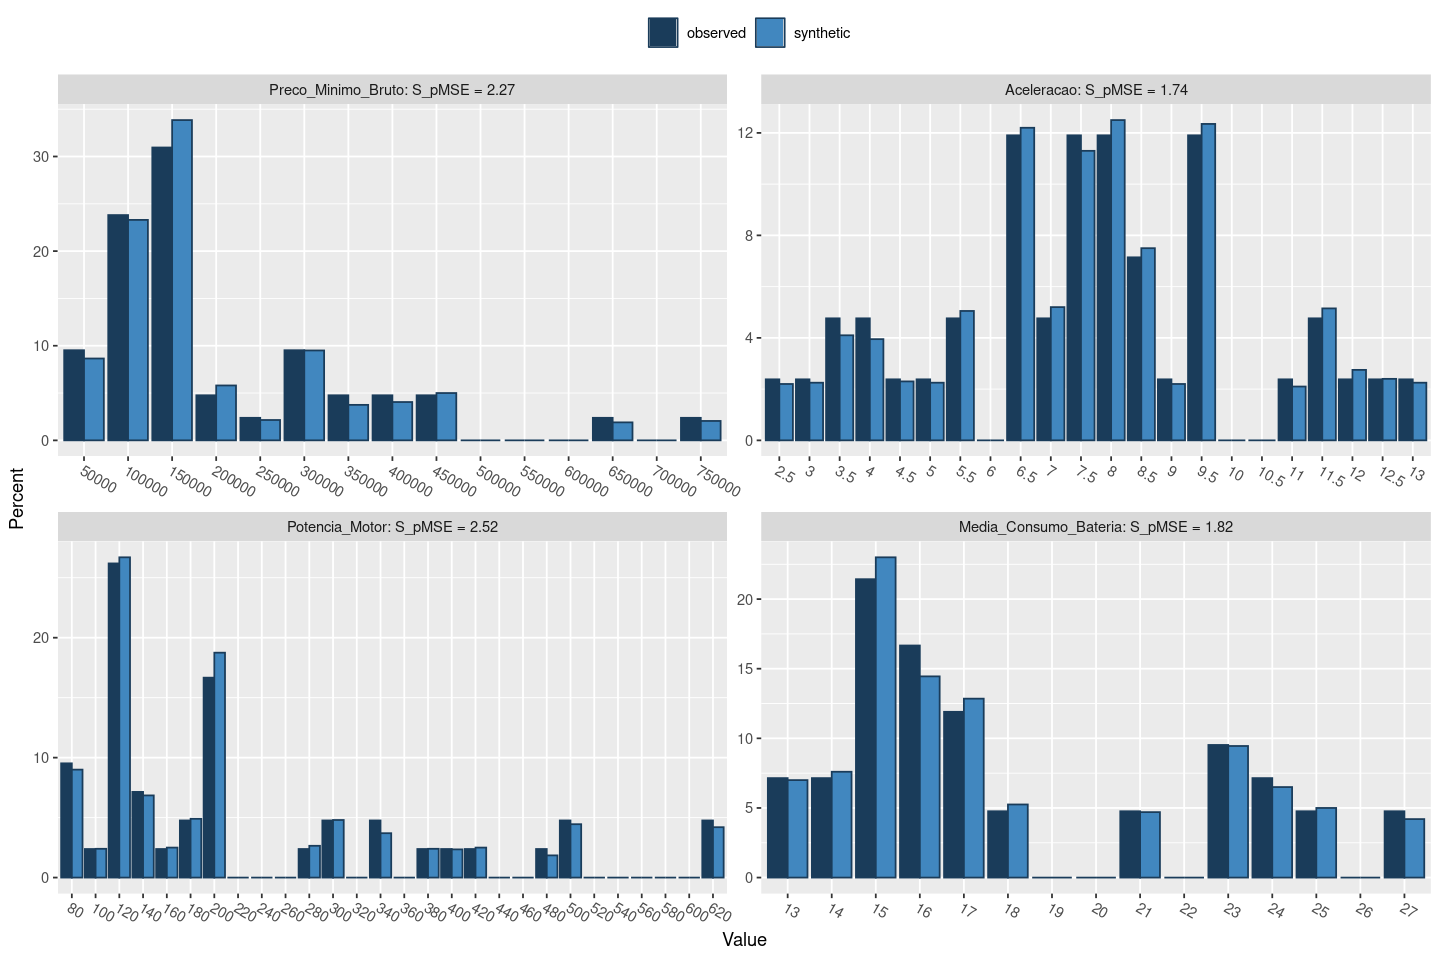

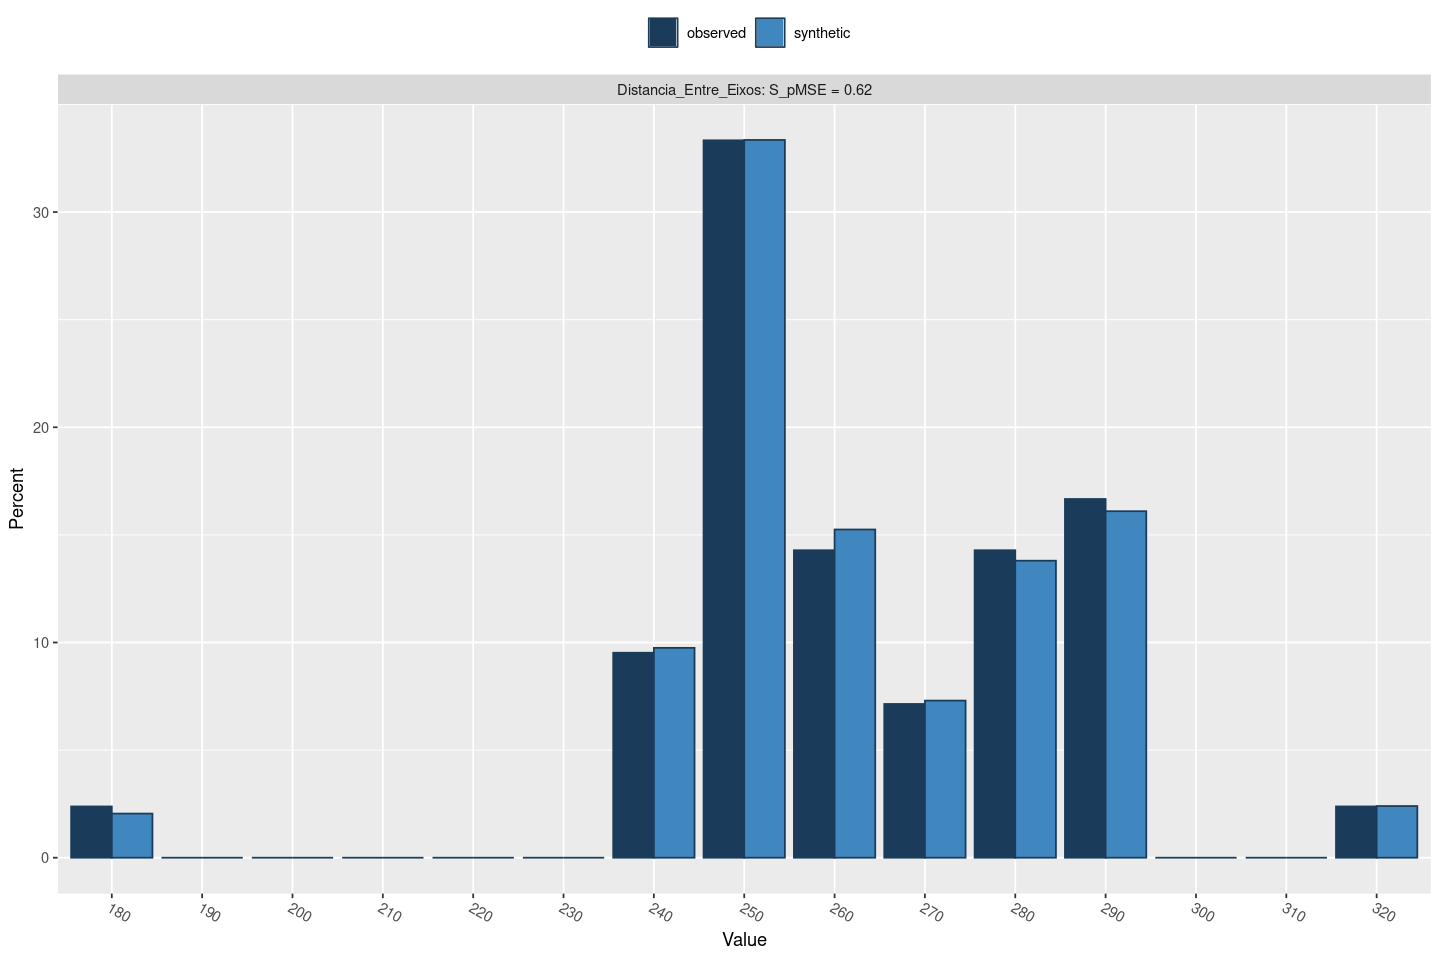

In [36]:
compare.data.frame(novo_dataset, dados_numericos, vars = c("Preco_Minimo_Bruto", "Aceleracao", "Potencia_Motor", "Media_Consumo_Bateria", "Distancia_Entre_Eixos"), cont.na = NULL)


Pode-se observar que as distribuições dos dados se mantiveram.

### **3.2 - Construindo modelos à partir dos dados sintéticos**

A partir deste ponto, os dados sintéticos gerados serão utilizados para treinar o modelo preditivo. Portanto, vamos separar nossos conjuntos de treino e teste, respectivamente:

In [37]:
amostra2 <- sample.split(novo_dataset$Torque_Maximo, SplitRatio = 0.70)

treino_syn = subset(novo_dataset, amostra == TRUE) #70% dos dados
teste_syn = subset(novo_dataset, amostra == FALSE) #30% dos dados

Construindo a segunda versão do modelo com regressão linear:

In [38]:
modelo_v2 <- lm(Media_Consumo_Bateria ~ ., treino_syn)
summary(modelo_v2)


Call:
lm(formula = Media_Consumo_Bateria ~ ., data = treino_syn)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3817 -1.2482  0.0417  1.2072  6.7591 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.182e+01  1.884e+00   6.273 4.73e-10 ***
Preco_Minimo_Bruto         3.149e-06  8.000e-07   3.936 8.70e-05 ***
Potencia_Motor             2.331e-03  8.895e-04   2.620  0.00888 ** 
Torque_Maximo              1.777e-03  5.647e-04   3.146  0.00169 ** 
Capacidade_Bateria        -4.365e-03  6.905e-03  -0.632  0.52737    
Rendimento_WLTP           -2.612e-03  9.456e-04  -2.762  0.00582 ** 
Distancia_Entre_Eixos      2.933e-02  5.041e-03   5.819 7.36e-09 ***
Comprimento               -2.022e-02  2.541e-03  -7.957 3.67e-15 ***
Largura                   -1.512e-03  5.486e-03  -0.276  0.78287    
Altura                    -3.136e-02  6.956e-03  -4.508 7.11e-06 ***
Peso_Vazio_Minimo          2.010e-03  5.018e-04   4.005 6.53e-05 *

Veja que agora, treinando o mesmo tipo de modelo com os dados gerados sinteticamente, a precisão caiu de 94% para 73%. Neste caso, vamos identificar os atributos com maior importância para o modelo preditivo, utilizando *Random Forest*.  
  

É importante salientar, que Random Forest é também uma ferramenta! Embora seja possível criar uma versão final do modelo preditivo usando Random Forest; ele também pode ser usado para outras tarefas, como por exemplo, extrair os atributos (variáveis) mais relevantes para otimização de um modelo!

In [39]:
variaveis_rel <- randomForest(Media_Consumo_Bateria ~ . ,
                              data = novo_dataset,
                              ntree = 500,
                              nodesize = 10,
                              importance = TRUE)

Plotando as variáveis mais relevantes para o modelo preditivo, segundo o Random Forest:

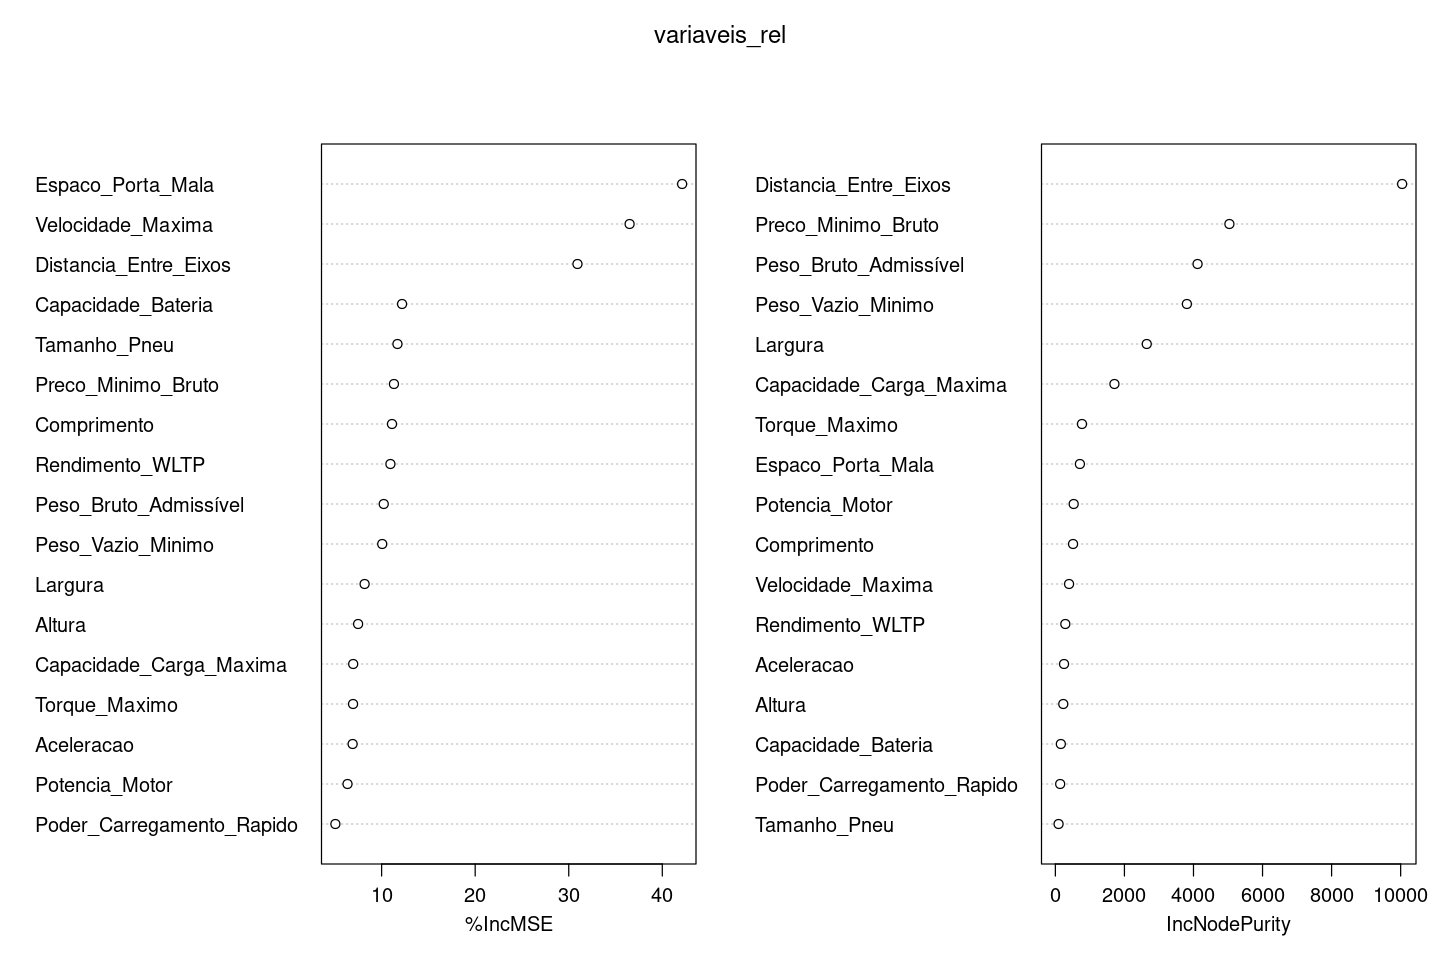

In [40]:
varImpPlot(variaveis_rel)

*(Vamos utilizar o parâmetro %IncMSE como referência. Quanto maior o valor, maior é a importância da variável para o modelo)*  

Analisando o gráfico acima, é possível perceber que o Random Forest indicou como pouco relevante, algumas variáveis que anteriormente mostraram ter uma correlação consideravelmente forte com o consumo médio de bateria, como por exemplo: Peso Vazio Mínimo; Peso Bruto Admissível; Capacidade de Aceleração; Potência do Motor; Carregamento Rápido; Torque Máximo.  
  
Para uma terceira versão do modelo preditivo, vamos utilizar o gŕafico acima para nos referenciar nas escolhas das variáveis preditoras.

In [41]:
modelo_v3 <- lm(Media_Consumo_Bateria ~ . - Tamanho_Pneu
                - Rendimento_WLTP
                - Largura
                - Comprimento
                - Preco_Minimo_Bruto
                - Altura
                - Aceleracao
                - Torque_Maximo
                - Poder_Carregamento_Rapido
                , treino_syn)
summary(modelo_v3)


Call:
lm(formula = Media_Consumo_Bateria ~ . - Tamanho_Pneu - Rendimento_WLTP - 
    Largura - Comprimento - Preco_Minimo_Bruto - Altura - Aceleracao - 
    Torque_Maximo - Poder_Carregamento_Rapido, data = treino_syn)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9510 -1.4385 -0.0448  1.4309  7.0895 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              4.1167321  1.0429050   3.947 8.30e-05 ***
Potencia_Motor           0.0033181  0.0008387   3.956 8.00e-05 ***
Capacidade_Bateria      -0.0227598  0.0052095  -4.369 1.34e-05 ***
Distancia_Entre_Eixos    0.0060585  0.0049710   1.219  0.22314    
Peso_Vazio_Minimo        0.0019768  0.0005152   3.837  0.00013 ***
Peso_Bruto_Admissível    0.0023164  0.0004093   5.660 1.84e-08 ***
Capacidade_Carga_Maxima  0.0040335  0.0006601   6.110 1.29e-09 ***
Velocidade_Maxima       -0.0010113  0.0030619  -0.330  0.74124    
Espaco_Porta_Mala        0.0067107  0.0007086   9.471  < 2e-16 ***
-

A acurácia do modelo não está satisfatória. Veja que mesmo ajustando alguns parâmetros, a precisão do nosso modelo diminuiu para um nível que não serve para colocar em produção!  
Neste caso, podemos verificar como outros modelos se comportam, utilizando as mesmas métricas.

#### **3.2.1 - Implementando Random Forest**

Vamos implementar, primeiro, o Random Forest utilizando todas as variáveis preditoras, para logo a seguir, retirar algumas variáveis de acordo com o gráfico de variáveis relevantes para o modelo.

In [42]:
modelo_v4 <- randomForest(Media_Consumo_Bateria ~ . ,
                              data = treino_syn,
                              ntree = 2000,
                              nodesize = 50)
                            
print(modelo_v4)


Call:
 randomForest(formula = Media_Consumo_Bateria ~ ., data = treino_syn,      ntree = 2000, nodesize = 50) 
               Type of random forest: regression
                     Number of trees: 2000
No. of variables tried at each split: 5

          Mean of squared residuals: 1.683612
                    % Var explained: 89.67


Agora, vamos selecionar as variáveis (de acordo com os índices %IncMSE).

In [43]:
modelo_v5 <- randomForest(Media_Consumo_Bateria ~ . - Tamanho_Pneu
                              - Altura
                              - Largura
                              - Comprimento
                              - Preco_Minimo_Bruto
                              - Rendimento_WLTP
                              - Peso_Bruto_Admissível
                              - Peso_Vazio_Minimo
                              - Torque_Maximo
                              - Potencia_Motor
                              - Aceleracao,
                              data = treino_syn,
                              ntree = 2000,
                              nodesize = 50)
                            
print(modelo_v5)



Call:
 randomForest(formula = Media_Consumo_Bateria ~ . - Tamanho_Pneu -      Altura - Largura - Comprimento - Preco_Minimo_Bruto - Rendimento_WLTP -      Peso_Bruto_Admissível - Peso_Vazio_Minimo - Torque_Maximo -      Potencia_Motor - Aceleracao, data = treino_syn, ntree = 2000,      nodesize = 50) 
               Type of random forest: regression
                     Number of trees: 2000
No. of variables tried at each split: 2

          Mean of squared residuals: 1.675517
                    % Var explained: 89.72


Com Random Forest, a capacidade de predição melhorou consideravelmente! Veja que aplicando os mesmos parâmetros para otimização, porém com um modelo diferente, obtivemos resultados muitos melhores!  
Neste último modelo construído, 89% da variação de consumo da bateria dos veículos elétricos, pode ser explicada pelas variáveis preditoras escolhidas.
Vamos comparar algumas previsões realizadas através dos dados para teste do modelo (*valores que nosso modelo ainda não conhece*) com médias de consumos reais.

In [44]:
previsao_rf <- predict(modelo_v5, teste_syn)
resultados2 <- cbind(previsao_rf, teste_syn$Media_Consumo_Bateria)
resultados2 <- as.data.frame(resultados2)
nomes_resultados2 <- list("Consumo Previsto", "Consumo Real")
colnames(resultados2) <- nomes_resultados2

head(resultados2, n=20)

,Consumo Previsto,Consumo Real
,<dbl>,<dbl>
1,24.40623,21.20
9,17.22043,17.10
17,16.23109,15.45
18,24.30138,27.20
21,24.79627,27.20
27,15.70095,17.60
28,16.34780,14.50
30,16.15865,15.45
31,23.60966,25.10


Bastante satisfatório!

## **4. Considerações Finais** 

De acordo com o ítem 2.2, algumas características técnicas como potência do motor e torque máximo (entre outras), por exemplo; mostraram forte correlação com o consumo médio de bateria dos veículos. Porém, o índice %IncMSE, não mostrou exatamente a mesma coisa. As variáveis que se mostraram mais relevantes para a precisão do nosso último modelo, foram: espaço do porta malas, distância entre eixos e velocidade máxima.

Portanto, como o objetivo da empresa é reduzir custos; ao migrar sua frota para carros elétricos, ela deverá optar por veículos menores (com menores distância entre eixos) e com motores que não apresentam uma velocidade máxima muito elevada.
  
Temos um modelo consideravelmente robusto, para colocar em produção.